<a href="https://colab.research.google.com/github/Bigote93/DataInsider/blob/main/DesafioDataInsider_Nalli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(0) Conexion con Drive

* Daremos acceso al drive del proyecto
* Crearemos un archivo de venv para almacenar la variables de este entorno

In [217]:
#Aplicar el llamado de almacenamiento

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Instalamos el colav con las variables de entorno
!pip install colab-env --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importamos la libreria
import colab_env
from colab_env import envvar_handler

!more drive/My\ Drive/vars.env



Mounted at /content/gdrive
more: stat of drive/My Drive/vars.env failed: Transport endpoint is not connected



colab_env.envvar_handler.add_env("TEST", "HELLO WORLD!", overwrite=True)

!more /content/drive/My\ Drive/vars.env


# (1) Se incorpora los datasets desde Forbes y ciudades


* https://data.world/aroissues/forbes-global-2000-2008-2019
* https://caelum-online-public.s3.amazonaws.com/challenge_data_insider/fortune_global_500.zip
* https://caelum-online-public.s3.amazonaws.com/challenge_data_insider/continentes_y_paises.zip





# (2) Carga de datasets

Se cargara los datos desde la documentacion mediante variables de analisis. Se utilizara metodos de creacion de datasets de la libreria Pandas.

* Importar libreria Pandas
* Se hara una iniciacion de variables de forma dinamica por cada excel
* Se manejara por excepciones la asignacion interna de DataFrames




In [218]:
import pandas as pd

In [ ]:
# Cargar los archivos de Excel Forbes de forma dinamica con el metodo global() desde 2000 a 200xx
forbes_datasets = []
forbes_datasets_names = []

for year in range(2008, 2023):
    filename = f"/content/drive/MyDrive/DesafioDataInsiderNalli/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - {year} — unified industry.xlsx"

    try:
        data = pd.read_excel(filename)
        variable_name = f"forbesglobal2000_{year}"
        forbes_datasets_names.append(variable_name)
        globals()[variable_name] = data
        print(f"Archivo cargado correctamente: {filename}")
        forbes_datasets.append(globals()[variable_name])

    except Exception as e:
        print(f"Error al cargar el archivo: {filename}")
        print(str(e))

#Las variables seran de la forma: forbesglobal2000_20xx
forbesglobal2000_2018



Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2008 — unified industry.xlsx
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2009 — unified industry.xlsx
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2010 — unified industry.xlsx
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2011 — unified industry.xlsx
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2012 — unified industry.xlsx
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2013 — unified industry.xls

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,ICBC,Banking,China,165338.0,43669.4,4210927.0,311014.0
1,2,China Construction Bank,Banking,China,143202.0,37203.1,3631583.0,261166.0
2,3,JPMorgan Chase,Banking,United States,118180.0,26496.0,2609785.0,387668.0
3,4,Berkshire Hathaway,Diversified Financials,United States,235165.0,39742.0,702651.0,491888.0
4,5,Agricultural Bank of China,Banking,China,129345.0,29638.7,3439314.0,184125.0
...,...,...,...,...,...,...,...,...
1995,1996,Fabege AB,Construction,Sweden,281.0,873.7,7482.0,3932.0
1996,1996,SEI Investments,Diversified Financials,United States,1572.0,455.5,1894.0,10177.0
1997,1996,Sumec Corporation,Capital Goods,China,11287.0,54.9,6930.0,1205.0
1998,1999,BioMarin Pharmaceutical,Drugs & Biotechnology,United States,1400.0,-144.9,4597.0,15623.0


* Ahora para cargar los datos de fortune_global_20xx debemos usar un webscrapping para extraer datos desde tablas desde documentos html.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# Cargar los archivos de HTML Fortune de forma dinamica con el metodo global() desde 2015 a 2022

ruta_fortune_base = ruta_base = '/content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_'

fortune_datasets = []
fortunes_datasets_names = []

# Cargar las páginas y crear las variables dinamicamente
for year in range(2015, 2023):
    try:
        filename = f"{ruta_base}{year}.html"
        variable_name = f"fortune_global_{year}"
        fortunes_datasets_names.append(variable_name)
        data = pd.read_html(filename)[0]
        globals()[variable_name] = data
        fortune_datasets.append(globals()[variable_name])
        print(f"Archivo cargado correctamente: {filename}")
    except Exception as e:
        print(f"Error al cargar el archivo: {filename}")
        print(str(e))

#Las variables seran de la forma: forbesglobal2000_20xx
fortune_global_2017

Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2015.html
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2016.html
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2017.html
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2018.html
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2019.html
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2020.html
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2021.html
Archivo cargado correctamente: /content/drive/MyDrive/DesafioDataInsiderNalli/fortune_global_500/fortune_global_2022.html


,RemoveRank,RemoveName,RemoveRevenues ($M),RemoveRevenue Percent Change,RemoveProfits ($M),RemoveAssets ($M),RemoveProfits Percent Change,RemoveEmployees,RemoveChange in Rank
0,1,Walmart,"$485,873",0.8%,"$13,643","$198,825",-7.2%,2300000,-
1,2,State Grid,"$315,199",-4.4%,"$9,571.3","$489,838",-6.2%,926067,-
2,3,Sinopec Group,"$267,518",-9.1%,"$1,257.9","$310,726",-65%,713288,1
3,4,China National Petroleum,"$262,573",-12.3%,"$1,867.5","$585,619",-73.7%,1512048,-1
4,5,Toyota Motor,"$254,694",7.7%,"$16,899.3","$437,575",-12.3%,364445,3
...,...,...,...,...,...,...,...,...,...
495,496,Teva Pharmaceutical Industries,"$21,903",11.5%,$329,"$92,890",-79.3%,56960,-
496,497,New China Life Insurance,"$21,796",-13.3%,$743.9,"$100,609",-45.6%,54378,-70
497,498,Wm. Morrison Supermarkets,"$21,741",-11.3%,$406.4,"$11,630",20.4%,77210,-61
498,499,TUI,"$21,655",-5.5%,"$1,151.7","$16,247",195.5%,66779,-32



* Ahora cargamos de manera individual los archivos dataset de continente y country debido a su irregularidad de valores.

In [ ]:
continente = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/continentes_y_paises/continente.csv')
country_code = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/continentes_y_paises/country_code.csv')
country_code.head(10)

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
5,Angola,AGO
6,Anguilla,AIA
7,Antigua and Barbuda,ATG
8,Argentina,ARG
9,Armenia,ARM


# (3) Incluir API polygon.io

* Importamos la api y la instalamos en nuestro cuadernillo

In [219]:
!pip install polygon-api-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [237]:
from polygon import RESTClient
##from local_settings import polygon as settings

* Cargamos la key de la api

In [238]:
api_key_poligon = 'dkbpyR0ZX19dWzdy3s6NeJb_iy93tmxS'

* Ahora inicializamos como cliente utilizando nuestra key de la API

In [239]:
client = RESTClient(api_key=api_key_poligon)
client

#(4)Importaremos los datos historicos .

1. Apple INC (AAPL)
2. Netflix INC (NFLX)
3. Microsoft Corporation (MSFT)
4. Amazon (AMZN)
5. Meta Platforms INC (META)

Luego creamos la funcion que aplicara en cada extraccion de datos

**Utilizamos la guia de : https://github.com/polygon-io/client-python**

In [ ]:
#------Amazon------#
ticker = "AMZN"
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2022-01-01", to="2022-12-31", limit=50000):
    aggs.append(a)

AMZN = pd.DataFrame(aggs)
AMZN_datafilter = AMZN.loc[:,['open','high','low','close','timestamp']]

In [ ]:
#-----Apple INC -----#
ticker = "AAPL"
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2022-01-01", to="2022-12-31", limit=50000):
    aggs.append(a)

AAPL = pd.DataFrame(aggs)
AAPL_datafilter = AAPL.loc[:,['open','high','low','close','timestamp']]


In [ ]:
#-----Microsoft CorporatioN-----#
ticker = "MSFT"
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2022-01-01", to="2022-12-31", limit=50000):
    aggs.append(a)

MSFT = pd.DataFrame(aggs)
MSFT_datafilter = MSFT.loc[:,['open','high','low','close','timestamp']]


In [ ]:
#-----Meta Platforms INC-----#
ticker = "META"
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2022-01-01", to="2022-12-31", limit=50000):
    aggs.append(a)

META_FB = pd.DataFrame(aggs)
META_FB_datafilter = META_FB.loc[:,['open','high','low','close','timestamp']]


In [ ]:
#-----Netflix INC-----#
ticker = "NFLX"
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2022-01-01", to="2022-12-31", limit=50000):
    aggs.append(a)

NFLX = pd.DataFrame(aggs)
NFLX_datafilter = NFLX.loc[:,['open','high','low','close','timestamp']]

#(4.1) Metodo solo si se tiene conexion premium

> Esta configuracion de variables globales solo se utiliza si no se sobrepasa la creacion de consultas en polygon.io debido a los limites que tiene la cuenta Free que ofrece.




```
tickers = ["AAPL", "GOOGL", "MSFT", "FB"]

for ticker in tickers:
    aggs = []
    for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2022-01-01", to="2022-06-13", limit=50000):
        aggs.append(a)
    df = pd.DataFrame(aggs)
    filtered_data = df.loc[:, ['open', 'high', 'low', 'close', 'timestamp']]
    globals()[ticker] = filtered_data
```





* Se cambia la variable timestamp a registro fecha

In [ ]:
dataframes_ticker = [
    AMZN_datafilter,
    AAPL_datafilter,
    MSFT_datafilter,
    META_FB_datafilter,
    NFLX_datafilter
]

for dataframes in dataframes_ticker:
  dataframes['timestamp'] = pd.to_datetime(dataframes['timestamp'], unit='ms')

* Ahora transformamos los dataframes a documento CSV y se almacenaran en la carpeta Historicos:

>> /content/drive/MyDrive/DesafioDataInsiderNalli/Historicos



In [ ]:
dataframe_name = [
    'AMZN_datafilter',
    'AAPL_datafilter',
    'MSFT_datafilter',
    'META_FB_datafilter',
    'NFLX_datafilter'
]


for dataframes, dataframe_name in zip(dataframes_ticker, dataframe_name):
  ruta_historico_dt = f'/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/{dataframe_name}.csv'
  dataframes.to_csv(ruta_historico_dt, index=False)



In [ ]:
NFLX_datafilter

,open,high,low,close,timestamp
0,604.88,604.88,604.88,604.88,2022-01-03 10:52:00
1,604.70,605.00,604.70,605.00,2022-01-03 13:00:00
2,604.89,604.89,604.89,604.89,2022-01-03 13:19:00
3,604.51,604.51,604.51,604.51,2022-01-03 13:30:00
4,605.00,605.00,605.00,605.00,2022-01-03 13:33:00
...,...,...,...,...,...
130343,295.07,295.07,295.00,295.00,2022-12-31 00:51:00
130344,295.45,295.45,295.20,295.20,2022-12-31 00:54:00
130345,295.44,295.44,295.44,295.44,2022-12-31 00:56:00
130346,295.74,295.74,295.74,295.74,2022-12-31 00:58:00


#(5) Data Wrangling

Debemos hacer lo siguiente a los dataset de Forbes Global 2000:

1. Cambiar el nombre de columnas segun el siguiente detalle

* Company -> Empresa
* Country -> Pais
* Industry -> Industria
* Sales -> Ingresos
* Profits -> Ganancias
* Assets -> Activos
* Market_Value -> Valor de mercado



2.  Generar tres columnas a cada dataframe

* Margen de Rentabilidad: Ganancias/Ingresos
* Rentabilidad de los Activos (ROA): Ganancias/Activos
* Año: Segun el nombre de cada dataset


In [ ]:
#Traimos de vuelta el array de los forbes forbes_datasets y hacemos el cambio directo a cada dataframe

for forbes_dataframe in forbes_datasets:
  forbes_dataframe.rename(columns={'Company':'Empresa'}, inplace=True)
  forbes_dataframe.rename(columns={'Country':'Pais'}, inplace=True)
  forbes_dataframe.rename(columns={'Industry':'Industria'}, inplace=True)
  forbes_dataframe.rename(columns={'Sales':'Ingresos'}, inplace=True)
  forbes_dataframe.rename(columns={'Profits':'Ganancias'}, inplace=True)
  forbes_dataframe.rename(columns={'Assets':'Activos'}, inplace=True)
  forbes_dataframe.rename(columns={'Market_Value':'Valor de Mercado'}, inplace=True)


forbesglobal2000_2022


,Rank_nr,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325
...,...,...,...,...,...,...,...,...
1995,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,37,1408.3,166,1136
1996,1997,NMDC,Materials,India,3520,1406.4,5715,6401
1997,1997,Sichuan Changhong Electric,Consumer Durables,China,15716,53.1,12105,1957
1998,1999,Satellite Chemical,Chemicals,China,4413,931.3,7640,9521


In [ ]:
#Generamos las dos columnas de Margen de Rentabilida y ROA.
#Luego una columna con los años recorriendo cada elemento del array forbes_datasets_names
#Extraeremos por cadena desde la posicion 17 a la -1

for names_dataset, forbes_dataframe in zip(forbes_datasets_names,forbes_datasets):
  forbes_dataframe['Margen de Rentabilidad'] = forbes_dataframe.Ganancias / forbes_dataframe.Ingresos
  forbes_dataframe['ROA'] = forbes_dataframe.Ganancias / forbes_dataframe.Activos
  forbes_dataframe['Año'] = names_dataset[17:]

forbesglobal2000_2022

,Rank_nr,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476,0.325233,0.093655,2022
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425,0.259593,0.009790,2022
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077,0.263160,0.182909,2022
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446,0.338159,0.010649,2022
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325,0.232036,0.009877,2022
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,37,1408.3,166,1136,38.062162,8.483735,2022
1996,1997,NMDC,Materials,India,3520,1406.4,5715,6401,0.399545,0.246089,2022
1997,1997,Sichuan Changhong Electric,Consumer Durables,China,15716,53.1,12105,1957,0.003379,0.004387,2022
1998,1999,Satellite Chemical,Chemicals,China,4413,931.3,7640,9521,0.211036,0.121898,2022


#(5.1) A los datasets de Fortune Global 500 le aplicaremos:

1. Cambiar el nombre de las columnas:

* RemoveName -> Empresa
* RemoveEmployees -> Empleados

2. Incorporar una columna para el año

3. Extraer del dataframe solo las columnas Empresa, Empleados y Año

In [ ]:
#Incorporamos el cambio de nombre de las columnas de cada dataframe de Fortune
#Luego se incorpora al arreglo auxiliar datasetux que almacenara la extraccion de las columnas de interes del dataframe

datasetux = []

for fortunes_datasets_name, fortune_dataset in zip(fortunes_datasets_names,fortune_datasets):
  fortune_dataset.rename(columns={'RemoveName': 'Empresa', 'RemoveEmployees':'Empleados'}, inplace=True)
  fortune_dataset['Año'] = fortunes_datasets_name[15:]
  fortune_dataset = fortune_dataset[['Empresa','Empleados','Año']]
  datasetux.append(fortune_dataset)



In [ ]:
#Se eliminan todas las columnas del dataframe original y se asigna el nuevo dataframe columna por columna

for fortune_dataset, datasetaux in zip(fortune_datasets, datasetux):
  fortune_dataset.drop(fortune_dataset.columns, axis=1, inplace=True)
  fortune_dataset['Empresa'] = datasetaux['Empresa']
  fortune_dataset['Empleados'] = datasetaux['Empleados']
  fortune_dataset['Año'] = datasetaux['Año']

##(5.2) Modificacion de nombres de empresas

Ante una busqueda simple de comparacion de empresas vistas entre las empresas de forbes y fortune existen una diferencia entre los nombres de las empresas lo que se ajustara en ese apartado

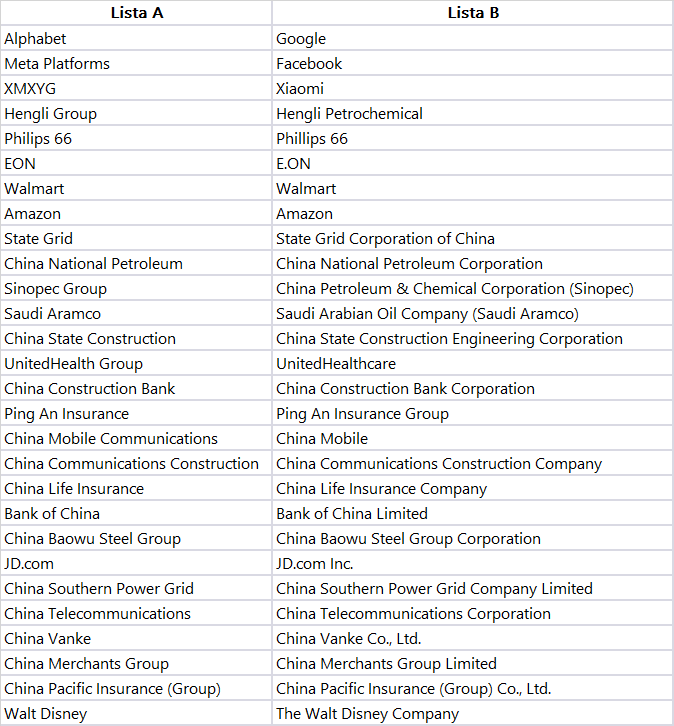




In [ ]:
#Lista de nombres correctos modificados de la listas Fortunes para qque coincidan con forbes
lista_check_names = pd.read_excel('/content/drive/MyDrive/DesafioDataInsiderNalli/Recursos_extra/check_names_empresas.xlsx')
lista_check_names.head(5)

,Forbes,Fortune
0,Alphabet,Google
1,Meta Platforms,Facebook
2,XMXYG,Xiaomi
3,Hengli Group,Hengli Petrochemical
4,Philips 66,Phillips 66


In [ ]:
#Cambiamos el nombre de las empresas de la lista fortunes para futuro merge

#fortune_datasets
#forbes_datasets

for empresa in fortune_datasets:
  for empresa_dataset in empresa['Empresa']:
    for name_correct, name_incorrect in zip(lista_check_names['Fortune'], lista_check_names['Forbes']):
      if empresa_dataset == name_incorrect:
        empresa_dataset = name_correct


In [ ]:
fortune_global_2022

,Empresa,Empleados,Año
0,Walmart,2300000,2022
1,Amazon,1608000,2022
2,State Grid,871145,2022
3,China National Petroleum,1090345,2022
4,Sinopec Group,542286,2022
...,...,...,...
495,DSV,77958,2022
496,ABB,104400,2022
497,Mondelez International,79000,2022
498,Danone,98105,2022


#(6) A los dataset de country_code y continente se le aplicara:

1. Renombrar los nombres de columnas de country de la forma:

* Country -> Nombre de Pais
* Code -> Codigo

2. Renombrar los nombres de la columna de continentes de la forma:

* Continent_Name -> Nombre continente
* Continent_Code -> Codigo Continente
* Three_Letter_Country_Code -> Codigo Pais
* Country_Name -> Nombre de Pais

In [ ]:
country_code.rename(columns={'Country':'Nombre de Pais', 'Code':'Codigo'}, inplace=True)

In [ ]:
continente.rename(columns={
    'Continent_Name':'Nombre Continente',
    'Continent_Code':'Codigo Continente',
    'Three_Letter_Country_Code': 'Codigo Pais',
    'Country_Name': 'Nombre de Pais'}, inplace=True)

country_code

,Nombre de Pais,Codigo
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


#(7) Juncion de tablas y analisis exploratorio

Antes de realizar los merges entre "Country_code" se reviso el dataset y se compara con el "Forbes2022" para ver si existen registros en las columnas a realizar merges "Pais" y "Nombre de pais" que necesiten modificacion antes de realizarlo

In [ ]:
paisses_with_comma = []
for nombre_pais in country_code['Nombre de Pais']:
  if ', ' in nombre_pais:
    paisses_with_comma.append(nombre_pais)

paisses_with_comma

['Bahamas, The',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Gambia, The',
 'Korea, North',
 'Korea, South',
 'Micronesia, Federated States of']

In [ ]:
paises_nombre = ['Bahamas','Congo','Gambia','Korea','Micronesia']
coincidencias_pais = []

for datasets in forbes_datasets:

  for nombre_comma in paises_nombre:

    for pais in datasets['Pais'].unique():

      if str(nombre_comma) in str(pais):
        coincidencias_pais.append([datasets['Año'][0],pais])

coincidencias_pais


[['2008', 'South Korea'],
 ['2009', 'South Korea'],
 ['2010', 'South Korea'],
 ['2011', 'South Korea'],
 ['2012', 'South Korea'],
 ['2013', 'South Korea'],
 ['2014', 'South Korea'],
 ['2015', 'South Korea'],
 ['2016', 'South Korea'],
 ['2017', 'South Korea'],
 ['2018', 'South Korea'],
 ['2019', 'South Korea'],
 ['2020', 'South Korea'],
 ['2021', 'South Korea'],
 ['2022', 'South Korea']]

* De los paises que presentan coincidencias de nombres desde la posible merge entre country_code y forbes 2022 solo se evidencia la presencia de South Korea. Por lo que haremos el cambio de nombre del registro en la ficha de Country_code de "Korea, South" a "South Korea" para el merge correcto.

* Ademas incluiremos un cambio de cada registro en el orden que quede sin commas y nombre original para futuros modificaciones de los tipos de registros de forbes

In [ ]:
country_code["Nombre de Pais"] = country_code["Nombre de Pais"].apply(lambda x: ' '.join(reversed(x.split(', '))).replace(",", "") if ', ' in x else x)
country_code.head(10)


,Nombre de Pais,Codigo
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
5,Angola,AGO
6,Anguilla,AIA
7,Antigua and Barbuda,ATG
8,Argentina,ARG
9,Armenia,ARM


In [ ]:
#Verificamos el cambio
any(country_code['Nombre de Pais'] == 'South Korea')

True

Ahora veremos que continentes son unicos en el dataframe de continente y si existen algunos continentes que no tienen codigo

In [ ]:
continente_cod_name = continente[['Nombre Continente','Codigo Continente']].drop_duplicates()

continente_cod_name

,Nombre Continente,Codigo Continente
0,Asia,AS
1,Europe,EU
2,Antarctica,AN
3,Africa,AF
4,Oceania,OC
7,North America,NaN
10,South America,SA


In [ ]:
#Agregamos entonces a continente la modificacion de asignar a North America el codigo NA
continente.loc[continente['Nombre Continente'] == 'North America', 'Codigo Continente'] = 'NA'

In [ ]:
#Verificamos el cambio
continente[['Nombre Continente','Codigo Continente']].drop_duplicates()

,Nombre Continente,Codigo Continente
0,Asia,AS
1,Europe,EU
2,Antarctica,AN
3,Africa,AF
4,Oceania,OC
7,North America,NA
10,South America,SA


In [ ]:
continente
country_code

,Nombre de Pais,Codigo
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


Realizado lo anterior. realizamos el merge

In [ ]:
#Hacemos el merge considerando outer para aquellos paises que no tienen empresas o empresas que no tienen pais
'''Si solo aplicaramos a 1 forbesglobal
forbesglobal2000_2022 = forbesglobal2000_2022.merge(country_code, how = 'outer', left_on ='Pais', right_on='Nombre de Pais')
'''
forbesgloba_merge1 = []

for year, forbesglobal in zip(range(2008,2023),forbes_datasets):
  variable_name = f'forbesgloba_merge1_2000_{year}'
  globals()[variable_name] = forbesglobal.merge(country_code, how='outer',left_on='Pais',right_on='Nombre de Pais')
  forbesgloba_merge1.append(globals()[variable_name])


forbesgloba_merge1_2000_2022

,Rank_nr,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre de Pais,Codigo
0,1,Berkshire Hathaway,Diversified Financials,United States,276094.0,89795.0,958784.0,741476.0,0.325233,0.093655,2022,United States,USA
1,4,JPMorgan Chase,Diversified Financials,United States,124542.0,42115.0,3954687.0,374446.0,0.338159,0.010649,2022,United States,USA
2,6,Amazon,Retailing,United States,469822.0,33364.0,420549.0,1468398.0,0.071014,0.079334,2022,United States,USA
3,7,Apple,Technology Hardware & Equipment,United States,378697.0,100555.0,381191.0,2640316.0,0.265529,0.263792,2022,United States,USA
4,9,Bank of America,Banking,United States,96826.0,30995.0,3238223.0,303102.0,0.320110,0.009572,2022,United States,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Virgin Islands,VGB
2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bank,WBG
2162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yemen,YEM
2163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zambia,ZMB


In [ ]:
#Identificamos los paises de cada continente para identificar su nombre

continente_with_comma = []
for nombre_pais in continente['Nombre de Pais']:
  if ', ' in nombre_pais:
    continente_with_comma.append(nombre_pais)

Sin embargo, como el merge lo realizaremos mediante el codigo de pais, esta modificacion de su escritura no es relevante, por lo que sera eliminada Pais.

In [ ]:
continente

,Nombre Continente,Codigo Continente,Codigo Pais,Nombre de Pais
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa
...,...,...,...,...
253,South America,SA,VEN,"Venezuela, Bolivarian Republic of"
254,Oceania,OC,WLF,Wallis and Futuna
255,Oceania,OC,WSM,"Samoa, Independent State of"
256,Asia,AS,YEM,Yemen


In [415]:
#Hacemos el segundo merge
''' Si solo aplicaramos a 1 forbesglobal
forbesglobal2000_2022 = forbesglobal2000_2022.merge(continente, how = 'outer', left_on = 'Codigo', right_on='Codigo Pais' )
'''
forbesgloba_merge2 = []

for year, forbesglobal in zip(range(2008,2023),forbesgloba_merge1):
  variable_name = f'forbesgloba_merge2_2000_{year}'
  globals()[variable_name] = forbesglobal.merge(continente, how = 'outer', left_on = 'Codigo', right_on='Codigo Pais' )
  forbesgloba_merge2.append(globals()[variable_name])


forbesgloba_merge2_2000_2022



,Rank_nr,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre de Pais_x,Codigo,Nombre Continente,Codigo Continente,Codigo Pais,Nombre de Pais_y
0,1,Berkshire Hathaway,Diversified Financials,United States,276094.0,89795.0,958784.0,741476.0,0.325233,0.093655,2022,United States,USA,North America,NA,USA,United States of America
1,4,JPMorgan Chase,Diversified Financials,United States,124542.0,42115.0,3954687.0,374446.0,0.338159,0.010649,2022,United States,USA,North America,NA,USA,United States of America
2,6,Amazon,Retailing,United States,469822.0,33364.0,420549.0,1468398.0,0.071014,0.079334,2022,United States,USA,North America,NA,USA,United States of America
3,7,Apple,Technology Hardware & Equipment,United States,378697.0,100555.0,381191.0,2640316.0,0.265529,0.263792,2022,United States,USA,North America,NA,USA,United States of America
4,9,Bank of America,Banking,United States,96826.0,30995.0,3238223.0,303102.0,0.320110,0.009572,2022,United States,USA,North America,NA,USA,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,EU,SJM,Svalbard & Jan Mayen Islands
2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,OC,TKL,Tokelau
2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,NA,TCA,Turks and Caicos Islands
2234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,NA,VIR,United States Virgin Islands


In [ ]:
#Generamos la asignacion de los valores NaN a Sin empresa en la columna Rank_nr
#forbesglobal2000_2022['Rank_nr'].fillna("Sin empresa", inplace = True)

#Verificamos los valores unicos de cada Rank_nr y si existen valores string o boolean
for valores in forbesglobal2000_2022['Rank_nr'].unique():
  if type(valores) == str:
    print(f'Existen valores de tipo string. Estos son: "{valores}"')
  if type(valores) == bool:
    print(f'Existen valores de tipo boolean. Estos son: "{valores}"')

#Cambiamos los valores de Rank_nr de aquellos que son True por 0
#forbesglobal2000_2022['Rank_nr'] = forbesglobal2000_2022['Rank_nr'].replace('True', 0)

forbesglobal2000_2022



Existen valores de tipo string. Estos son: "True"


,Rank_nr,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476,0.325233,0.093655,2022
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425,0.259593,0.009790,2022
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077,0.263160,0.182909,2022
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446,0.338159,0.010649,2022
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325,0.232036,0.009877,2022
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,37,1408.3,166,1136,38.062162,8.483735,2022
1996,1997,NMDC,Materials,India,3520,1406.4,5715,6401,0.399545,0.246089,2022
1997,1997,Sichuan Changhong Electric,Consumer Durables,China,15716,53.1,12105,1957,0.003379,0.004387,2022
1998,1999,Satellite Chemical,Chemicals,China,4413,931.3,7640,9521,0.211036,0.121898,2022


#(7.1) Se verifica el tipo de dato y se cambia para mantener la columna limpia de datos diferentes.

In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Rank_nr'].unique():
    if type(valores) == str:
      valores['Rank_nr'] = valores['Rank_nr'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Rank_nr'] = valores['Rank_nr'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')


In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Empresa'].unique():
    if type(valores) == int:
      valores['Empresa'] = valores['Empresa'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Empresa'] = valores['Empresa'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')


In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Industria'].unique():
    if type(valores) == int:
      valores['Industria'] = valores['Industria'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Industria'] = valores['Industria'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')


In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Pais'].unique():
    if type(valores) == float:
      valores['Pais'] = valores['Pais'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Pais'] = valores['Pais'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')


In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Ingresos'].unique():
    if type(valores) == str:
      valores['Ingresos'] = valores['Ingresos'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Ingresos'] = valores['Ingresos'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Ganancias'].unique():
    if type(valores) == str:
      valores['Ganancias'] = valores['Ganancias'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Ganancias'] = valores['Ganancias'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Activos'].unique():
    if type(valores) == str:
      valores['Activos'] = valores['Activos'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Activos'] = valores['Activos'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Valor de Mercado'].unique():
    if type(valores) == str:
      valores['Valor de Mercado'] = valores['Valor de Mercado'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Valor de Mercado'] = valores['Valor de Mercado'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['Margen de Rentabilidad'].unique():
    if type(valores) == str:
      valores['Margen de Rentabilidad'] = valores['Margen de Rentabilidad'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['Margen de Rentabilidad'] = valores['Margen de Rentabilidad'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

In [ ]:
##Verificamos los valores unicos de cada Empresa y si existen valores string o boolean
for forbesglobal in forbesgloba_merge2:
  for valores in forbesglobal['ROA'].unique():
    if type(valores) == str:
      valores['ROA'] = valores['ROA'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

    if type(valores) == bool:
      valores['ROA'] = valores['ROA'].replace(valores, 'Sin empresa')
      print(f'Existen valores de tipo string en forbes {forbesglobal["Año"][0]}. Se han reemplazado por: "Sin empresa"')

Utilizaremos esto si necesitamos realizarlo rapidamente como ciclo. Pero dependiendo del ordenador y los recursos puede quedar cracheado.



```

for forbesglobal_n in forbesgloba_merge2:
    for indice in range(1, len(forbesglobal_n.columns)):
        for valores in forbesglobal_n[forbesglobal_n.columns[indice]].unique():
            if isinstance(valores, str):
                print(f'Existen valores de tipo string en forbes {forbesglobal_n[forbesglobal_n.columns[indice]].iloc[0]}. Estos son: "{valores}"')
            if isinstance(valores, bool):
                print(f'Existen valores de tipo boolean en forbes {forbesglobal_n[forbesglobal_n.columns[indice]].iloc[0]}. Estos son: "{valores}"')

```






#(7.2) Limpiamos los registros NaN que no tienen relacion alguna con los demas.

In [416]:
#Asignamos a valores NaN en ranking como "Sin empresa" en las columnas con NaN

for forbesmerges in forbesgloba_merge2:
  forbesmerges['Rank_nr'].fillna("Sin empresa", inplace = True)
  forbesmerges['Empresa'].fillna("Sin empresa", inplace = True)
  forbesmerges['Industria'].fillna("Sin empresa", inplace = True)
  forbesmerges['Pais'].fillna("Sin empresa", inplace = True)
  forbesmerges['Ingresos'].fillna("Sin empresa", inplace = True)
  forbesmerges['Ganancias'].fillna("Sin empresa", inplace = True)
  forbesmerges['Activos'].fillna("Sin empresa", inplace = True)
  forbesmerges['Valor de Mercado'].fillna("Sin empresa", inplace = True)
  forbesmerges['Margen de Rentabilidad'].fillna("Sin empresa", inplace = True)
  forbesmerges['ROA'].fillna("Sin empresa", inplace = True)
  forbesmerges['Año'].fillna(forbesmerges['Año'][1], inplace = True)


forbesgloba_merge2_2000_2022

,Rank_nr,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre de Pais_x,Codigo,Nombre Continente,Codigo Continente,Codigo Pais,Nombre de Pais_y
0,1,Berkshire Hathaway,Diversified Financials,United States,276094.0,89795.0,958784.0,741476.0,0.325233,0.093655,2022,United States,USA,North America,NA,USA,United States of America
1,4,JPMorgan Chase,Diversified Financials,United States,124542.0,42115.0,3954687.0,374446.0,0.338159,0.010649,2022,United States,USA,North America,NA,USA,United States of America
2,6,Amazon,Retailing,United States,469822.0,33364.0,420549.0,1468398.0,0.071014,0.079334,2022,United States,USA,North America,NA,USA,United States of America
3,7,Apple,Technology Hardware & Equipment,United States,378697.0,100555.0,381191.0,2640316.0,0.265529,0.263792,2022,United States,USA,North America,NA,USA,United States of America
4,9,Bank of America,Banking,United States,96826.0,30995.0,3238223.0,303102.0,0.32011,0.009572,2022,United States,USA,North America,NA,USA,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,Europe,EU,SJM,Svalbard & Jan Mayen Islands
2232,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,Oceania,OC,TKL,Tokelau
2233,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,North America,NA,TCA,Turks and Caicos Islands
2234,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,North America,NA,VIR,United States Virgin Islands


Ahora veririficamos en el dataset de continente si existen paises con coma para verificar datos escritos incorrectamente

In [ ]:
#Eliminamos la columna Nombre_Pais_x e Nombre_Pais_y ya que usaremos como referencia la columna Pais

for forbesmerges in forbesgloba_merge2:
  forbesmerges.drop(['Nombre de Pais_x','Pais', 'Codigo'], axis = 1, inplace = True)


In [417]:
#Cambiamos el nombre de la columna "Nombre de Pais_y" por "Pais"
for forbesmerges in forbesgloba_merge2:
  forbesmerges = forbesmerges.rename(columns={'Nombre de Pais_y': 'Pais'}, inplace = True)

forbesgloba_merge2_2000_2022

,Rank_nr,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre de Pais_x,Codigo,Nombre Continente,Codigo Continente,Codigo Pais,Pais
0,1,Berkshire Hathaway,Diversified Financials,United States,276094.0,89795.0,958784.0,741476.0,0.325233,0.093655,2022,United States,USA,North America,NA,USA,United States of America
1,4,JPMorgan Chase,Diversified Financials,United States,124542.0,42115.0,3954687.0,374446.0,0.338159,0.010649,2022,United States,USA,North America,NA,USA,United States of America
2,6,Amazon,Retailing,United States,469822.0,33364.0,420549.0,1468398.0,0.071014,0.079334,2022,United States,USA,North America,NA,USA,United States of America
3,7,Apple,Technology Hardware & Equipment,United States,378697.0,100555.0,381191.0,2640316.0,0.265529,0.263792,2022,United States,USA,North America,NA,USA,United States of America
4,9,Bank of America,Banking,United States,96826.0,30995.0,3238223.0,303102.0,0.32011,0.009572,2022,United States,USA,North America,NA,USA,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,Europe,EU,SJM,Svalbard & Jan Mayen Islands
2232,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,Oceania,OC,TKL,Tokelau
2233,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,North America,NA,TCA,Turks and Caicos Islands
2234,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,NaN,NaN,North America,NA,VIR,United States Virgin Islands


#(8) Ahora ajustamos la union entre los forbes 2000 a 2015


In [ ]:
forbes_merge_2000_2015 = pd.concat(forbesgloba_merge2[7:])

forbes_merge_2000_2015 = forbes_merge_2000_2015.drop(forbes_merge_2000_2015[forbes_merge_2000_2015["Rank_nr"] == 'Sin empresa'].index)



In [ ]:
forbes_merge_2000_2015

,Rank_nr,Empresa,Industria,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre Continente,Codigo Continente,Codigo Pais,Pais
0,1.0,ICBC,Banking,166796.0,44757.2,3322043.0,278327.0,0.268335,0.013473,2015,Asia,AS,CHN,"China, People's Republic of"
1,2.0,China Construction Bank,Banking,130473.0,37038.9,2698925.0,212945.0,0.283882,0.013724,2015,Asia,AS,CHN,"China, People's Republic of"
2,3.0,Agricultural Bank of China,Banking,129221.0,29124.5,2574815.0,189879.0,0.225385,0.011311,2015,Asia,AS,CHN,"China, People's Republic of"
3,4.0,Bank of China,Banking,120297.0,27526.8,2458336.0,199130.0,0.228824,0.011197,2015,Asia,AS,CHN,"China, People's Republic of"
4,8.0,PetroChina,Oil & Gas Operations,333386.0,17388.3,387714.0,334578.0,0.052157,0.044848,2015,Asia,AS,CHN,"China, People's Republic of"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,1524,Halyk Bank,Banking,2933.0,1083.6,27809.0,2967.0,0.369451,0.038966,2022,Asia,AS,KAZ,"Kazakhstan, Republic of"
2029,1608,Kaspi.kz JSC,Diversified Financials,2195.0,1012.2,8298.0,13114.0,0.461139,0.121981,2022,Europe,EU,KAZ,"Kazakhstan, Republic of"
2030,1608,Kaspi.kz JSC,Diversified Financials,2195.0,1012.2,8298.0,13114.0,0.461139,0.121981,2022,Asia,AS,KAZ,"Kazakhstan, Republic of"
2031,1608,YPF,Oil & Gas Operations,13019.0,2.7,23274.0,3314.0,0.000207,0.000116,2022,South America,SA,ARG,"Argentina, Argentine Republic"


#(8.1) Creamos el concatenacion de los dataset de fortune

In [ ]:
fortune_global_concat = pd.concat(fortune_datasets)

fortune_global_concat

,Empresa,Empleados,Año
0,Walmart,2200000,2015
1,Sinopec Group,897488,2015
2,Royal Dutch Shell,94000,2015
3,China National Petroleum,1636532,2015
4,Exxon Mobil,83700,2015
...,...,...,...
495,DSV,77958,2022
496,ABB,104400,2022
497,Mondelez International,79000,2022
498,Danone,98105,2022


In [ ]:
#Verificar que empresas no estan disponibles en el forbes_global_200_20
empresas_no_disponible = []

for fortune_empresa in fortune_global_2015['Empresa']:
  for forbe_merge_n in forbes_merge_2000_2015:
    if fortune_empresa not in forbes_merge_2000_2015['Empresa']:
      empresas_no_disponible.append(fortune_empresa)

set(empresas_no_disponible)


Hacemos el cruce de merge entre "fortune_global_concat" y el "forbes_merge_2000_2015"

In [ ]:
forbes_fortune = forbes_merge_2000_2015.merge(fortune_global_concat, how="outer", on=["Empresa", "Año"])

forbes_fortune

,Rank_nr,Empresa,Industria,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre Continente,Codigo Continente,Codigo Pais,Pais,Empleados
0,1.0,ICBC,Banking,166796.0,44757.2,3322043.0,278327.0,0.268335,0.013473,2015,Asia,AS,CHN,"China, People's Republic of",NaN
1,2.0,China Construction Bank,Banking,130473.0,37038.9,2698925.0,212945.0,0.283882,0.013724,2015,Asia,AS,CHN,"China, People's Republic of",372321.0
2,3.0,Agricultural Bank of China,Banking,129221.0,29124.5,2574815.0,189879.0,0.225385,0.011311,2015,Asia,AS,CHN,"China, People's Republic of",505627.0
3,4.0,Bank of China,Banking,120297.0,27526.8,2458336.0,199130.0,0.228824,0.011197,2015,Asia,AS,CHN,"China, People's Republic of",308128.0
4,8.0,PetroChina,Oil & Gas Operations,333386.0,17388.3,387714.0,334578.0,0.052157,0.044848,2015,Asia,AS,CHN,"China, People's Republic of",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,NaN,Paramount Global,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN,25115.0
18058,NaN,Jabil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN,238000.0
18059,NaN,Randstad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN,39530.0
18060,NaN,RWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN,18867.0


In [ ]:
#Mostramos la cantidad de registros no nulos del datafeame forbes acumulado
forbes_fortune.count()

Rank_nr                   16265
Empresa                   18062
Industria                 16265
Ingresos                  16265
Ganancias                 16265
Activos                   16265
Valor de Mercado          16265
Margen de Rentabilidad    16265
ROA                       16265
Año                       18062
Nombre Continente         16263
Codigo Continente         16263
Codigo Pais               16263
Pais                      16263
Empleados                  4023
dtype: int64

In [ ]:
auxiliar = forbes_fortune[['Empresa','Año', 'Pais']]
auxiliar

auxiliar.to_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/prueba.csv')

In [ ]:
#Cantidad de nulos por columna
forbes_fortune.isna().sum()

Rank_nr                    1797
Empresa                       0
Industria                  1797
Ingresos                   1797
Ganancias                  1797
Activos                    1797
Valor de Mercado           1797
Margen de Rentabilidad     1797
ROA                        1797
Año                           0
Nombre Continente          1799
Codigo Continente          1799
Codigo Pais                1799
Pais                       1799
Empleados                 14039
dtype: int64

In [ ]:
#Eliminamos todas las filas que en los empleados es 0 que seran los datos que utilizaremos

forbes_fortune = forbes_fortune.dropna()

forbes_fortune

,Rank_nr,Empresa,Industria,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre Continente,Codigo Continente,Codigo Pais,Pais,Empleados
1,2.0,China Construction Bank,Banking,130473.0,37038.9,2698925.0,212945.0,0.283882,0.013724,2015,Asia,AS,CHN,"China, People's Republic of",372321.0
2,3.0,Agricultural Bank of China,Banking,129221.0,29124.5,2574815.0,189879.0,0.225385,0.011311,2015,Asia,AS,CHN,"China, People's Republic of",505627.0
3,4.0,Bank of China,Banking,120297.0,27526.8,2458336.0,199130.0,0.228824,0.011197,2015,Asia,AS,CHN,"China, People's Republic of",308128.0
8,37.0,China Life Insurance,Insurance,71439.0,5219.4,362116.0,160495.0,0.073061,0.014414,2015,Asia,AS,CHN,"China, People's Republic of",151719.0
9,38.0,Bank of Communications,Banking,53613.0,10688.3,1010364.0,71248.0,0.19936,0.010579,2015,Asia,AS,CHN,"China, People's Republic of",95659.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16058,362,Wilmar International,"Food, Drink & Tobacco",65839.0,1893.3,58718.0,20862.0,0.028757,0.032244,2022,Asia,AS,SGP,"Singapore, Republic of",100000.0
16063,1281,Olam Group,"Food, Drink & Tobacco",34975.0,467.9,23781.0,4747.0,0.013378,0.019675,2022,Asia,AS,SGP,"Singapore, Republic of",62548.0
16089,443,Fortum,Utilities,132855.0,872.3,170194.0,15636.0,0.006566,0.005125,2022,Europe,EU,FIN,"Finland, Republic of",19140.0
16150,388,OMV Group,Oil & Gas Operations,42025.0,2473.9,64551.0,16244.0,0.058867,0.038325,2022,Europe,EU,AUT,"Austria, Republic of",22434.0


In [ ]:
#Almacenamos el merge final en un excel de control
forbes_fortune.to_excel('/content/drive/MyDrive/DesafioDataInsiderNalli/Recursos_extra/forbes_fortune_dataframe.xlsx')

In [ ]:
#Verificamos la cantidad de nulos por columna
forbes_fortune.isna().sum()

Rank_nr                   0
Empresa                   0
Industria                 0
Ingresos                  0
Ganancias                 0
Activos                   0
Valor de Mercado          0
Margen de Rentabilidad    0
ROA                       0
Año                       0
Nombre Continente         0
Codigo Continente         0
Codigo Pais               0
Pais                      0
Empleados                 0
dtype: int64

#(8.2) Desafio extra de empresa Wuhan Iron & Steel que esta presente en ambos dataframmes

#Cuestionario A

## (1) ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?

In [ ]:
top_10_empresas_forbes_2022 = forbesgloba_merge2_2000_2022.groupby('Pais')['Empresa'].count().sort_values(ascending=False).head(10)
top_10_empresas_forbes_2022


Pais
United States of America                              584
China, People's Republic of                           297
Japan                                                 196
Korea, Republic of                                     65
Canada                                                 64
United Kingdom of Great Britain & Northern Ireland     64
India, Republic of                                     55
France, French Republic                                54
Hong Kong, Special Administrative Region of China      54
Germany, Federal Republic of                           52
Name: Empresa, dtype: int64

## (2) ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?

In [ ]:
top_4_empresas_tecnologicas_forbes =   forbesgloba_merge2_2000_2022[forbesgloba_merge2_2000_2022['Industria'] == 'IT Software & Services'].groupby('Pais')['Empresa'].count().sort_values(ascending= False).head(4)

top_4_empresas_tecnologicas_forbes

Pais
United States of America       37
China, People's Republic of     8
India, Republic of              6
Canada                          3
Name: Empresa, dtype: int64

## (3) ¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

In [ ]:
#Creamos el filtro por industria de Hoteles, Restaurantes y Entretenimiento.
Hoteles_forbes = forbesgloba_merge2_2000_2022[forbesgloba_merge2_2000_2022['Industria'] == 'Hotels, Restaurants & Leisure']

#Obtener el margen de las 5 mayores empresas con peores ganancias
top_5_peores = Hoteles_forbes.sort_values('Ganancias').head(5)

#Obtener el margen de rentabilidad de esas empresas
margen_hoteles_forbes = top_5_peores['Margen de Rentabilidad']

#Calcular el total de perdidas registradas de todas las empreas dedicadas a la industria de Hoteles
total_perdidas = Hoteles_forbes['Ganancias'].sum()

# Calcular el porcentaje de las pérdidas de las 5 empresas respecto al total de pérdidas de la industria
porcentaje_perdida = (margen_hoteles_forbes.sum() / total_perdidas) * 100

print("El margen de pérdida de las 5 empresas que presentaron mayores perjuicios en la industria de Hoteles, Restaurantes y Entretenimiento es:", porcentaje_perdida, "%")

El margen de pérdida de las 5 empresas que presentaron mayores perjuicios en la industria de Hoteles, Restaurantes y Entretenimiento es: -0.15157570399531778 %


## (4) Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?

In [ ]:
# Filtra el DataFrame para incluir solo las empresas de la industria petrolera en Asia
df_petroleras_asia = forbesgloba_merge2_2000_2022[(forbesgloba_merge2_2000_2022['Nombre Continente'] == 'Asia') & (forbesgloba_merge2_2000_2022['Industria'] == 'Oil & Gas Operations')]

df_petroleras_asia


,Rank_nr,Empresa,Industria,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre Continente,Codigo Continente,Codigo Pais,Pais
589,21,PetroChina,Oil & Gas Operations,380310.0,14290.0,392600.0,142302.0,0.037575,0.036398,2022,Asia,AS,CHN,"China, People's Republic of"
594,45,Sinopec,Oil & Gas Operations,384822.0,11041.0,292050.0,80809.0,0.028691,0.037805,2022,Asia,AS,CHN,"China, People's Republic of"
709,940,ENN Energy Holdings,Oil & Gas Operations,14444.0,1202.5,15688.0,14989.0,0.083253,0.076651,2022,Asia,AS,CHN,"China, People's Republic of"
874,1984,China Petroleum Engineering,Oil & Gas Operations,11947.0,160.2,16492.0,2530.0,0.013409,0.009714,2022,Asia,AS,CHN,"China, People's Republic of"
881,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,400376.0,105363.0,576041.0,2292077.0,0.26316,0.182909,2022,Asia,AS,SAU,"Saudi Arabia, Kingdom of"
895,1704,Petro Rabigh,Oil & Gas Operations,12167.0,543.1,19385.0,6867.0,0.044637,0.028017,2022,Asia,AS,SAU,"Saudi Arabia, Kingdom of"
924,385,ENEOS Holdings,Oil & Gas Operations,90306.0,3447.7,79991.0,11379.0,0.038178,0.043101,2022,Asia,AS,JPN,Japan
950,635,Inpex,Oil & Gas Operations,11325.0,2030.0,44794.0,17107.0,0.179249,0.045319,2022,Asia,AS,JPN,Japan
951,639,Idemitsu Kosan,Oil & Gas Operations,54540.0,2205.9,38990.0,7973.0,0.040446,0.056576,2022,Asia,AS,JPN,Japan
992,1060,Cosmo Energy Holdings,Oil & Gas Operations,21946.0,1359.0,16900.0,2113.0,0.061925,0.080414,2022,Asia,AS,JPN,Japan


In [ ]:
# Calcula el margen de rentabilidad superando en más del 20% utilizando una condición booleana
empresas_superiores_20 = df_petroleras_asia[df_petroleras_asia['Margen de Rentabilidad'] > 1.2]
empresas_superiores_20['Empresa']


Series([], Name: Empresa, dtype: object)

## (5) ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?

In [ ]:
#Se condidera un margen de las 10 mejores
empresas_americanas_mayor_rentabilidad = forbesgloba_merge2_2000_2022[(forbesgloba_merge2_2000_2022['Nombre Continente'] == 'North America') | (forbesgloba_merge2_2000_2022['Nombre Continente'] == 'South America')]
df_ordenado = empresas_americanas_mayor_rentabilidad.sort_values(['Industria', 'Margen de Rentabilidad'], ascending=False)

# Elimina filas duplicadas, manteniendo solo las filas con la mayor rentabilidad en cada grupo
empresas_destacadas = df_ordenado.drop_duplicates(subset='Industria')

empresas_destacadas.head(10)

,Rank_nr,Empresa,Industria,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA,Año,Nombre Continente,Codigo Continente,Codigo Pais,Pais
292,928,American Water Works,Utilities,3930.0,1263.0,27009.0,29844.0,0.321374,0.046762,2022,North America,NA,USA,United States of America
1410,543,Canadian Pacific Railway,Transportation,6377.0,2274.8,54108.0,69423.0,0.356719,0.042042,2022,North America,NA,CAN,Canada
363,1179,Fastenal,Trading Companies,6298.0,984.0,4467.0,32781.0,0.15624,0.220282,2022,North America,NA,USA,United States of America
391,1289,Frontier Communications Parent,Telecommunications Services,6411.0,4955.0,17136.0,6709.0,0.77289,0.289157,2022,North America,NA,USA,United States of America
397,1313,Arista Networks,Technology Hardware & Equipment,2948.0,840.9,5734.0,36224.0,0.285244,0.146652,2022,North America,NA,USA,United States of America
2040,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,Sin empresa,2022,North America,NA,AIA,Anguilla
123,350,Texas Instruments,Semiconductors,18344.0,7736.0,24676.0,159944.0,0.421718,0.313503,2022,North America,NA,USA,United States of America
237,705,O'Reilly Automotive,Retailing,13328.0,2164.7,12393.0,46923.0,0.162417,0.174671,2022,North America,NA,USA,United States of America
343,1108,Chesapeake Energy,Oil & Gas Operations,7317.0,6328.0,11009.0,11076.0,0.864835,0.574802,2022,North America,NA,USA,United States of America
1435,1728,Shaw Communications,Media,4387.0,796.4,12368.0,15123.0,0.181536,0.064392,2022,North America,NA,CAN,Canada


## (6) Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con mayores pérdidas registradas por industria a nivel global?

In [ ]:
# Filtra el DataFrame para incluir solo las filas con valores de 'Ganancias' negativos
forbesgloba_merge2_2000_2022_p = forbesgloba_merge2_2000_2022[forbesgloba_merge2_2000_2022['Ganancias'] != 'Sin empresa']
forbesgloba_merge2_2000_2022_p.loc[:, 'Ganancias'] = forbesgloba_merge2_2000_2022_p['Ganancias'].astype(float)


# Filtra el DataFrame para incluir solo las empresas europeas y excluir la industria bancaria
df_europeas_sin_bancos = forbesgloba_merge2_2000_2022_p[(forbesgloba_merge2_2000_2022_p['Nombre Continente'] == 'Europe') & (forbesgloba_merge2_2000_2022_p['Industria'] != 'Banking')]

# Agrupa el DataFrame filtrado por la columna "Industria" y encuentra las empresas con las mayores pérdidas en cada industria
empresas_mayores_perdidas = df_europeas_sin_bancos.groupby('Industria')['Ganancias'].nlargest(1)

# Obtiene los datos de las empresas con las mayores pérdidas
empresas_destacadas = df_europeas_sin_bancos.loc[empresas_mayores_perdidas.droplevel(0).index]

# Imprime las empresas europeas con las mayores pérdidas registradas por industria a nivel global
print(empresas_destacadas[['Industria', 'Empresa', 'Ganancias']])


                             Industria                    Empresa  Ganancias
1718               Aerospace & Defense                     AIRBUS     4979.7
1189      Business Services & Supplies                       RELX     2023.1
1285                     Capital Goods         Schneider Electric     3787.1
1228                         Chemicals                       BASF     6528.1
1227                     Conglomerates                    Siemens     6554.1
1595                      Construction                  Grupo ACS     3600.3
1224                 Consumer Durables        Mercedes-Benz Group    27192.7
1864            Diversified Financials                Investor AB     8025.3
1447             Drugs & Biotechnology                   Novartis    24138.0
1721                      Food Markets  Royal Ahold Delhaize N.V.     2655.9
1446             Food, Drink & Tobacco                     Nestlé    18490.2
1785  Health Care Equipment & Services                  Medtronic     4914.0

<ipython-input-182-d26267d78d81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forbesgloba_merge2_2000_2022_p.loc[:, 'Ganancias'] = forbesgloba_merge2_2000_2022_p['Ganancias'].astype(float)
<ipython-input-182-d26267d78d81>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  forbesgloba_merge2_2000_2022_p.loc[:, 'Ganancias'] = forbesgloba_merge2_2000_2022_p['Ganancias'].astype(float)


## (7) Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?

In [ ]:

# Filtrar el DataFrame para incluir solo las filas correspondientes a la industria bancaria
bancos = forbesgloba_merge2_2000_2022_p.loc[forbesgloba_merge2_2000_2022_p['Industria'] == 'Banking']

#Filtrar los activos menores a 30000
bancos_activos = bancos.loc[bancos['Activos']< 30000]

# Obtener la distribución de ingresos con respecto a las ganancias
distribucion_ingresos = bancos_activos['Ingresos'] / bancos_activos['Ganancias']

# Obtener la distribución de activos con respecto a las ganancias
distribucion_activos = bancos_activos['Activos'] / bancos_activos['Ganancias']

distribucion_empresa = bancos_activos['Empresa']

# Crear un DataFrame con la distribución de ingresos, activos y empresa
data_frame_distribucion_bank = pd.DataFrame({
    'Empresa': distribucion_empresa,
    'Distribucion Ingreso': distribucion_ingresos,
    'Distribucion Ganancia': distribucion_activos
})

data_frame_distribucion_bank


,Empresa,Distribucion Ingreso,Distribucion Ganancia
1812,Grupo Inbursa,3.351462,27.09527
2008,Vietnam Technological & Commercial Joint Stock...,2.633719,31.704993
2027,Halyk Bank,2.706718,25.663529
2028,Halyk Bank,2.706718,25.663529


## (8) Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)

### Accion AAPL

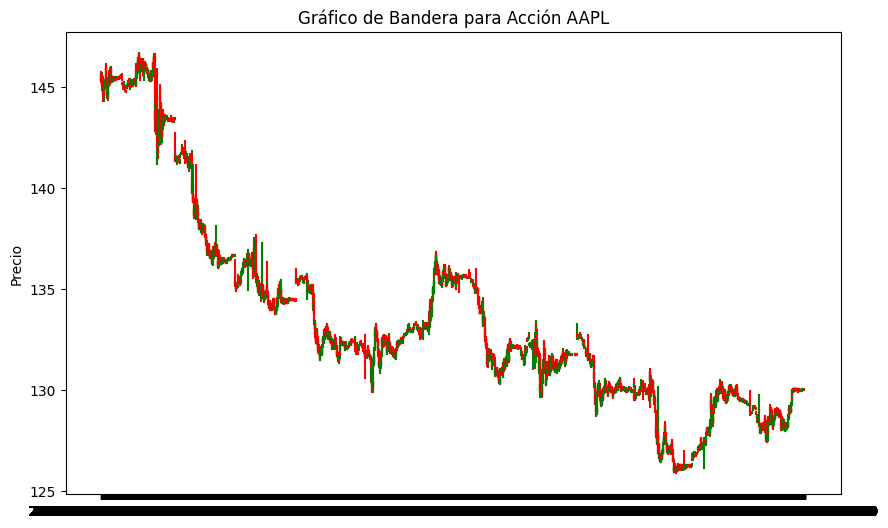

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los dataframes de las acciones almacenadas.
AAPL_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/AAPL_datafilter.csv')

# Paso 1: Obtener los datos históricos de la acción (considerando que ya has cargado los datos en 'datos_accion')
AAPL_dataframe = AAPL_dataframe.tail(10000)  # Selecciona las últimas 10,000 filas

# Restablecer el índice del DataFrame
AAPL_dataframe = AAPL_dataframe.reset_index(drop=True)

# Paso 2: Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Gráfico de Bandera para Acción AAPL")
ax.set_ylabel("Precio")

# Paso 3: Crear las banderas
for i in range(len(AAPL_dataframe)):
    if AAPL_dataframe['close'][i] > AAPL_dataframe['open'][i]:
        # Bandera alcista (verde)
        ax.plot([AAPL_dataframe['timestamp'][i], AAPL_dataframe['timestamp'][i]], [AAPL_dataframe['low'][i], AAPL_dataframe['high'][i]], color='green')
    else:
        # Bandera bajista (roja)
        ax.plot([AAPL_dataframe['timestamp'][i], AAPL_dataframe['timestamp'][i]], [AAPL_dataframe['low'][i], AAPL_dataframe['high'][i]], color='red')

# Paso 4: Mostrar el gráfico
plt.show()

In [280]:
#Cargamos el dataframe
AAPL_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/AMZN_datafilter.csv')

#Verificamos la variable de timestamp de la columna timestamp
AAPL_dataframe['timestamp'] = pd.to_datetime(AAPL_dataframe['timestamp'])

#Calculamos estadísticas semanales a partir de los datos por minuto indicando el metodo resample()
AAPL_datafilter_weekly = AAPL_dataframe.resample('W', on='timestamp').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

#Creamos una columna de diferencia entre open y close para identificar sus cambios
AAPL_datafilter_weekly['Diferencia'] = AAPL_datafilter_weekly['close'] - AAPL_datafilter_weekly['open']

#Identificamos el cambio minimo positivo y negativo para ver la semana de compra y venta respectivamente
semana_compra = AAPL_datafilter_weekly['Diferencia'].idxmin()
semana_venta = AAPL_datafilter_weekly['Diferencia'].idxmax()

print("Mejor semana para comprar:", semana_compra)
print("Mejor semana para vender:", semana_venta)

Mejor semana para comprar: 2022-05-01 00:00:00
Mejor semana para vender: 2022-03-20 00:00:00


### Accion AMZN

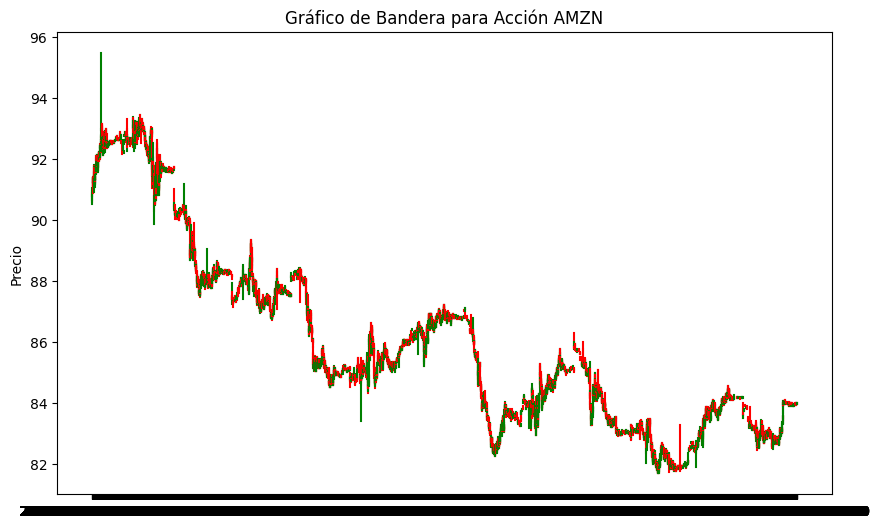

In [281]:
# Cargamos los dataframes de las acciones almacenadas.
AMZN_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/AMZN_datafilter.csv')

# Paso 1: Obtener los datos históricos de la acción (considerando que ya has cargado los datos en 'datos_accion')
AMZN_dataframe = AMZN_dataframe.tail(10000)  # Selecciona las últimas 10,000 filas

# Restablecer el índice del DataFrame
AMZN_dataframe = AMZN_dataframe.reset_index(drop=True)

# Paso 2: Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Gráfico de Bandera para Acción AMZN")
ax.set_ylabel("Precio")

# Paso 3: Crear las banderas
for i in range(len(AMZN_dataframe)):
    if AMZN_dataframe['close'][i] > AMZN_dataframe['open'][i]:
        # Bandera alcista (verde)
        ax.plot([AMZN_dataframe['timestamp'][i], AMZN_dataframe['timestamp'][i]], [AMZN_dataframe['low'][i], AMZN_dataframe['high'][i]], color='green')
    else:
        # Bandera bajista (roja)
        ax.plot([AMZN_dataframe['timestamp'][i], AMZN_dataframe['timestamp'][i]], [AMZN_dataframe['low'][i], AMZN_dataframe['high'][i]], color='red')

# Paso 4: Mostrar el gráfico
plt.show()

In [282]:
#Cargamos el dataframe
AMZN_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/AMZN_datafilter.csv')

#Verificamos la variable de timestamp de la columna timestamp
AMZN_dataframe['timestamp'] = pd.to_datetime(AMZN_dataframe['timestamp'])

#Calculamos estadísticas semanales a partir de los datos por minuto indicando el metodo resample()
AMZN_datafilter_weekly = AMZN_dataframe.resample('W', on='timestamp').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

#Creamos una columna de diferencia entre open y close para identificar sus cambios
AMZN_datafilter_weekly['Diferencia'] = AMZN_datafilter_weekly['close'] - AMZN_datafilter_weekly['open']

#Identificamos el cambio minimo positivo y negativo para ver la semana de compra y venta respectivamente
semana_compra = AMZN_datafilter_weekly['Diferencia'].idxmin()
semana_venta = AMZN_datafilter_weekly['Diferencia'].idxmax()

print("Mejor semana para comprar:", semana_compra)
print("Mejor semana para vender:", semana_venta)


Mejor semana para comprar: 2022-05-01 00:00:00
Mejor semana para vender: 2022-03-20 00:00:00


### Accion Meta_FB

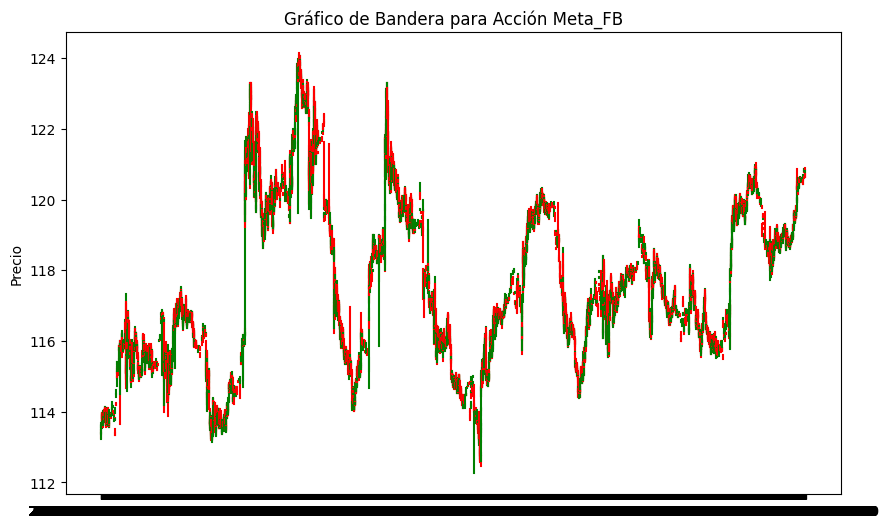

In [283]:
# Cargamos los dataframes de las acciones almacenadas.
META_FB_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/META_FB_datafilter.csv')

# Paso 1: Obtener los datos históricos de la acción (considerando que ya has cargado los datos en 'datos_accion')
META_FB_dataframe = META_FB_dataframe.tail(10000)  # Selecciona las últimas 10,000 filas

# Restablecer el índice del DataFrame
META_FB_dataframe = META_FB_dataframe.reset_index(drop=True)

# Paso 2: Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Gráfico de Bandera para Acción Meta_FB")
ax.set_ylabel("Precio")

# Paso 3: Crear las banderas
for i in range(len(META_FB_dataframe)):
    if META_FB_dataframe['close'][i] > META_FB_dataframe['open'][i]:
        # Bandera alcista (verde)
        ax.plot([META_FB_dataframe['timestamp'][i], META_FB_dataframe['timestamp'][i]], [META_FB_dataframe['low'][i], META_FB_dataframe['high'][i]], color='green')
    else:
        # Bandera bajista (roja)
        ax.plot([META_FB_dataframe['timestamp'][i], META_FB_dataframe['timestamp'][i]], [META_FB_dataframe['low'][i], META_FB_dataframe['high'][i]], color='red')

# Paso 4: Mostrar el gráfico
plt.show()

In [284]:
#Cargamos el dataframe
META_FB_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/AMZN_datafilter.csv')

#Verificamos la variable de timestamp de la columna timestamp
META_FB_dataframe['timestamp'] = pd.to_datetime(META_FB_dataframe['timestamp'])

#Calculamos estadísticas semanales a partir de los datos por minuto indicando el metodo resample()
META_FB_datafilter_weekly = META_FB_dataframe.resample('W', on='timestamp').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

#Creamos una columna de diferencia entre open y close para identificar sus cambios
META_FB_datafilter_weekly['Diferencia'] = META_FB_datafilter_weekly['close'] - META_FB_datafilter_weekly['open']

#Identificamos el cambio minimo positivo y negativo para ver la semana de compra y venta respectivamente
semana_compra = META_FB_datafilter_weekly['Diferencia'].idxmin()
semana_venta = META_FB_datafilter_weekly['Diferencia'].idxmax()

print("Mejor semana para comprar:", semana_compra)
print("Mejor semana para vender:", semana_venta)

Mejor semana para comprar: 2022-05-01 00:00:00
Mejor semana para vender: 2022-03-20 00:00:00


### Accion MSFT

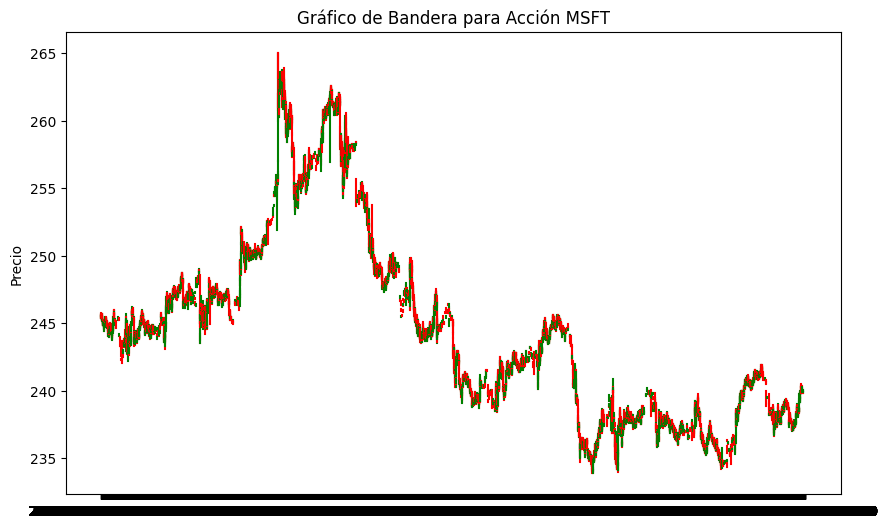

In [285]:
# Cargamos los dataframes de las acciones almacenadas.
MSFT_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/MSFT_datafilter.csv')

# Paso 1: Obtener los datos históricos de la acción (considerando que ya has cargado los datos en 'datos_accion')
MSFT_dataframe = MSFT_dataframe.tail(10000)  # Selecciona las últimas 10,000 filas

# Restablecer el índice del DataFrame
MSFT_dataframe = MSFT_dataframe.reset_index(drop=True)

# Paso 2: Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Gráfico de Bandera para Acción MSFT")
ax.set_ylabel("Precio")

# Paso 3: Crear las banderas
for i in range(len(MSFT_dataframe)):
    if MSFT_dataframe['close'][i] > MSFT_dataframe['open'][i]:
        # Bandera alcista (verde)
        ax.plot([MSFT_dataframe['timestamp'][i], MSFT_dataframe['timestamp'][i]], [MSFT_dataframe['low'][i], MSFT_dataframe['high'][i]], color='green')
    else:
        # Bandera bajista (roja)
        ax.plot([MSFT_dataframe['timestamp'][i], MSFT_dataframe['timestamp'][i]], [MSFT_dataframe['low'][i], MSFT_dataframe['high'][i]], color='red')

# Paso 4: Mostrar el gráfico
plt.show()

In [286]:
#Cargamos el dataframe
MSFT_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/AMZN_datafilter.csv')

#Verificamos la variable de timestamp de la columna timestamp
MSFT_dataframe['timestamp'] = pd.to_datetime(MSFT_dataframe['timestamp'])

#Calculamos estadísticas semanales a partir de los datos por minuto indicando el metodo resample()
MSFT_datafilter_weekly = MSFT_dataframe.resample('W', on='timestamp').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

#Creamos una columna de diferencia entre open y close para identificar sus cambios
MSFT_datafilter_weekly['Diferencia'] = MSFT_datafilter_weekly['close'] - MSFT_datafilter_weekly['open']

#Identificamos el cambio minimo positivo y negativo para ver la semana de compra y venta respectivamente
semana_compra = MSFT_datafilter_weekly['Diferencia'].idxmin()
semana_venta = MSFT_datafilter_weekly['Diferencia'].idxmax()

print("Mejor semana para comprar:", semana_compra)
print("Mejor semana para vender:", semana_venta)

Mejor semana para comprar: 2022-05-01 00:00:00
Mejor semana para vender: 2022-03-20 00:00:00


### Accion NTFX

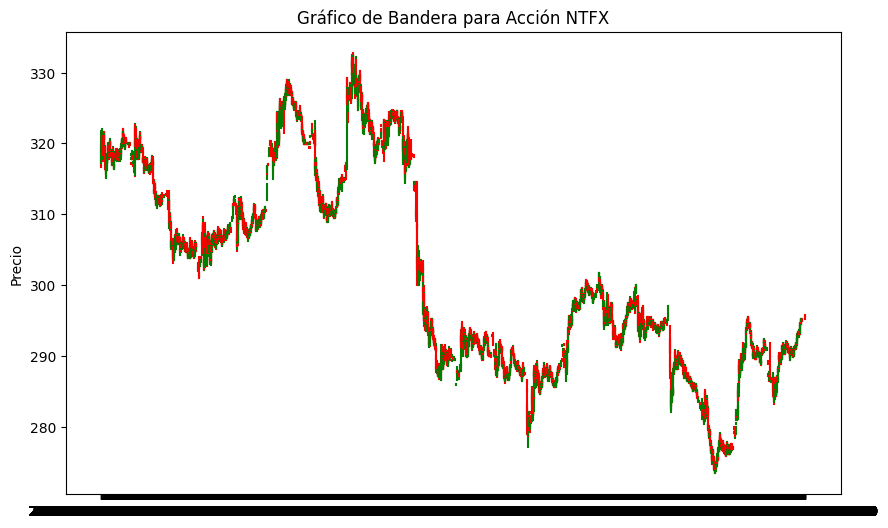

In [289]:
# Cargamos los dataframes de las acciones almacenadas.
NTFX_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/NFLX_datafilter.csv')

# Paso 1: Obtener los datos históricos de la acción (considerando que ya has cargado los datos en 'datos_accion')
NTFX_dataframe = NTFX_dataframe.tail(10000)  # Selecciona las últimas 10,000 filas

# Restablecer el índice del DataFrame
NTFX_dataframe = NTFX_dataframe.reset_index(drop=True)

# Paso 2: Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Gráfico de Bandera para Acción NTFX")
ax.set_ylabel("Precio")

# Paso 3: Crear las banderas
for i in range(len(NTFX_dataframe)):
    if NTFX_dataframe['close'][i] > NTFX_dataframe['open'][i]:
        # Bandera alcista (verde)
        ax.plot([NTFX_dataframe['timestamp'][i], NTFX_dataframe['timestamp'][i]], [NTFX_dataframe['low'][i], NTFX_dataframe['high'][i]], color='green')
    else:
        # Bandera bajista (roja)
        ax.plot([NTFX_dataframe['timestamp'][i], NTFX_dataframe['timestamp'][i]], [NTFX_dataframe['low'][i], NTFX_dataframe['high'][i]], color='red')

# Paso 4: Mostrar el gráfico
plt.show()

In [287]:
#Cargamos el dataframe
NTFX_dataframe = pd.read_csv('/content/drive/MyDrive/DesafioDataInsiderNalli/Historicos/AMZN_datafilter.csv')

#Verificamos la variable de timestamp de la columna timestamp
NTFX_dataframe['timestamp'] = pd.to_datetime(NTFX_dataframe['timestamp'])

#Calculamos estadísticas semanales a partir de los datos por minuto indicando el metodo resample()
NTFX_datafilter_weekly = NTFX_dataframe.resample('W', on='timestamp').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

#Creamos una columna de diferencia entre open y close para identificar sus cambios
NTFX_datafilter_weekly['Diferencia'] = NTFX_datafilter_weekly['close'] - NTFX_datafilter_weekly['open']

#Identificamos el cambio minimo positivo y negativo para ver la semana de compra y venta respectivamente
semana_compra = NTFX_datafilter_weekly['Diferencia'].idxmin()
semana_venta = NTFX_datafilter_weekly['Diferencia'].idxmax()

print("Mejor semana para comprar:", semana_compra)
print("Mejor semana para vender:", semana_venta)

Mejor semana para comprar: 2022-05-01 00:00:00
Mejor semana para vender: 2022-03-20 00:00:00


#Cueationario B

## (1) ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?                      

In [294]:
#Agrupo el DataFrame por país y cuenta el número de empresas en cada país.
top_paises = forbes_fortune.groupby('Pais').size().reset_index(name='Numero de Empresas')

#Ordeno el DataFrame en orden descendente según el número de empresas y selecciona los 10 primeros países.
top_paises = top_paises.sort_values(by='Numero de Empresas', ascending=False).head(10)

print("Top 10 de países con más empresas en Forbes:")
print(top_paises)


Top 10 de países con más empresas en Forbes:
                                                 Pais  Numero de Empresas
29                           United States of America                 765
16                                              Japan                 289
7                         China, People's Republic of                 182
28  United Kingdom of Great Britain & Northern Ire...                 133
10                            France, French Republic                 121
11                       Germany, Federal Republic of                 116
17                                 Korea, Republic of                  90
5                                              Canada                  72
13                                 India, Republic of                  56
25                   Switzerland, Swiss Confederation                  51


## (2) ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?

In [296]:
#obtener solo tecnologia y telecomunicaciones

tecnologia_telecom = forbes_fortune[(forbes_fortune['Industria'] == 'Telecommunications Services') | (forbes_fortune['Industria'] == 'Technology Hardware & Equipment') | (forbes_fortune['Industria'] == 'Telecommunications services')]

#Agrupo el DataFrame filtrado por país y cuento el número de empresas en cada país.
top_paises_tec_tel = tecnologia_telecom.groupby('Pais').size().reset_index(name='Numero de Empresas')

#Ordeno el DataFrame en orden descendente según el número de empresas y selecciona los 5 primeros países.
top_paises_tec_tel = top_paises_tec_tel.sort_values(by='Numero de Empresas', ascending=False).head(5)

print("Top 5 de países con más empresas en el área de tecnología y telecomunicaciones:")
print(top_paises_tec_tel)


Top 5 de países con más empresas en el área de tecnología y telecomunicaciones:
                            Pais  Numero de Empresas
14      United States of America                  48
12                        Taiwan                  25
7                          Japan                  20
3        France, French Republic                   9
4   Germany, Federal Republic of                   8


## (3) ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

In [304]:
#Filtro el DataFrame para incluir solo las empresas en la industria de Hoteles, Restaurantes y Entretenimiento.
hoteles_restaurantes_entretenimiento = forbes_fortune[forbes_fortune['Industria'] == 'Hotels, Restaurants & Leisure']

#Ordeno el DataFrame filtrado por la columna 'Ganancias' en orden ascendente.
hoteles_restaurantes_entretenimiento = hoteles_restaurantes_entretenimiento.sort_values(by='Ganancias')

#Selecciono las 10 empresas con mayores pérdidas.
top_empresas_perdidas = hoteles_restaurantes_entretenimiento.head(10)

#Calculo el margen de pérdida dividiendo las pérdidas de cada empresa entre sus ingresos.
top_empresas_perdidas['Margen de Pérdida'] = top_empresas_perdidas['Ganancias'] / top_empresas_perdidas['Ingresos']

print("Margen de pérdida de las 10 empresas con mayores perjuicios en la industria de Hoteles, Restaurantes y Entretenimiento:")
print(top_empresas_perdidas[['Empresa', 'Margen de Pérdida','Año']])


Margen de pérdida de las 10 empresas con mayores perjuicios en la industria de Hoteles, Restaurantes y Entretenimiento:
             Empresa Margen de Pérdida   Año
13664  Compass Group          0.006671  2021
3064   Compass Group          0.049402  2016
5547   Compass Group          0.050598  2017
11672  Compass Group          0.044617  2020
1082   Compass Group          0.050708  2015
9349   Compass Group          0.048986  2019
7293   Compass Group          0.050816  2018
10532      Starbucks          0.127168  2020
14337      Starbucks           0.14471  2022
4348      McDonald's          0.189274  2017


<ipython-input-304-3d13d54d3763>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_empresas_perdidas['Margen de Pérdida'] = top_empresas_perdidas['Ganancias'] / top_empresas_perdidas['Ingresos']


## (4)  Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?

In [454]:
#Filtro el DataFrame para incluir solo las empresas en la industria petrolera y en la región de las Américas.

industria_petrolera_americas = forbes_fortune[(forbes_fortune['Industria'] == 'Oil & Gas Operations') & ((forbes_fortune['Nombre Continente'] in [] ) | (forbes_fortune['Nombre Continente'] == 'South America') )]

#Calculo la rentabilidad de los activos dividiendo las ganancias entre los activos.
industria_petrolera_americas['Rentabilidad de Activos'] = (industria_petrolera_americas['Ganancias'] / industria_petrolera_americas['Activos'])

#Filtro el DataFrame para incluir solo las empresas con una rentabilidad de activos superior al 20%.
empresas_superiores_20 = industria_petrolera_americas[industria_petrolera_americas['Rentabilidad de Activos'] > 0]


empresas_superiores_20.sort_values('Rentabilidad de Activos', ascending = False)[['Empresa','Rentabilidad de Activos']]



<ipython-input-454-5a4588150118>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industria_petrolera_americas['Rentabilidad de Activos'] = (industria_petrolera_americas['Ganancias'] / industria_petrolera_americas['Activos'])


,Empresa,Rentabilidad de Activos
15888,Petrobras,0.113165
1783,Ecopetrol,0.062706
11808,Petrobras,0.044201
9682,Petrobras,0.031759
13920,Petrobras,0.007249
7606,Petrobras,0.002589


.... Como no existen rentabilidad superior a 20%. No existen empresas que alcancen este nivel de rentabilidad

##(5) ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?

In [464]:
#Filtro por empresas europeas
empresas_europeas = forbes_fortune[forbes_fortune['Nombre Continente'] == 'Europe']
empresas_europeas['Margen de Rentabilidad'] = empresas_europeas['Margen de Rentabilidad'].astype(float)

#Eliminamos el registro que este 'Sin empresa'
empresas_europeas = empresas_europeas[empresas_europeas['Activos'] != 'Sin empresa']
empresas_europeas = empresas_europeas[empresas_europeas['Margen de Rentabilidad'] != 1.849678555028318]


#Identificamos el mayor rentabilidad por empresa
empresas_mejor_rentabilidad = empresas_europeas.groupby('Industria')['Margen de Rentabilidad'].idxmax()


empresas_destacadas = empresas_europeas.loc[empresas_mejor_rentabilidad]

#Generamos dataframe y filtramos los primeros 10 y por orden descendente
empresas_destacada_dataframe = pd.DataFrame(empresas_destacadas).head(10).sort_values('Margen de Rentabilidad',ascending=False)

empresas_destacada_dataframe[['Industria','Margen de Rentabilidad']]




<ipython-input-464-dfba59ab5825>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas_europeas['Margen de Rentabilidad'] = empresas_europeas['Margen de Rentabilidad'].astype(float)


,Industria,Margen de Rentabilidad
15722,Banking,0.295786
15951,Diversified Financials,0.262765
13598,Conglomerates,0.195020
7216,Chemicals,0.189899
8962,Consumer Durables,0.184169
15517,Capital Goods,0.110847
11458,Aerospace & Defense,0.097497
15687,Construction,0.084968
9905,Business Services & Supplies,0.077712
1010,Air Courier,0.036571


##(6) ¿Cuáles fueron las 10 empresas norteamericanas con mayores pérdidas registradas por industria a nivel global?

In [483]:
# Convierto la columna "Ganancias" a tipo de datos numérico
empresas_norteamericanas['Ganancias'] = pd.to_numeric(empresas_norteamericanas['Ganancias'])

# Filtro el DataFrame para incluir solo las empresas norteamericanas
empresas_norteamericanas = empresas_norteamericanas[empresas_norteamericanas['Nombre Continente'] == 'North America']

# Agrupo el DataFrame filtrado por la columna "Industria" y encontrar las empresas con las mayores pérdidas en cada industria
empresas_mayores_perdidas = empresas_norteamericanas.groupby('Industria')['Ganancias'].nsmallest(10)

# Obtengo los datos de las empresas con las mayores pérdidas
empresas_destacadas = empresas_norteamericanas.loc[empresas_mayores_perdidas.index.get_level_values(1)]

# Las empresas norteamericanas con las mayores pérdidas registradas por industria a nivel global
americana_perdida = pd.DataFrame(empresas_destacadas)

# Elimino duplicados de empresas
americana_perdida = americana_perdida.drop_duplicates(subset='Empresa').head(10)

americana_perdida[['Industria','Empresa','Ganancias']]



,Industria,Empresa,Ganancias
12623,Aerospace & Defense,Boeing,-11873.0
12621,Aerospace & Defense,Raytheon Technologies,-3519.0
12618,Aerospace & Defense,BAE Systems,1665.8
2350,Aerospace & Defense,Northrop Grumman,1990.0
2345,Aerospace & Defense,Raytheon,2098.0
2335,Air Courier,FedEx,1136.0
296,Airline,Delta Air Lines,659.0
301,Airline,United Continental Holdings,1130.0
6432,Airline,American Airlines Group,1871.0
6452,Banking,Citigroup,-5838.0


##(7) ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?

In [433]:

# Filtro el DataFrame para incluir solo las filas correspondientes a la industria bancaria
bancos = forbes_fortune.loc[forbes_fortune['Industria'] == 'Banking']

# Filtro los bancos cuyos activos no superan los 15000 millones de dólares
bancos_activos = bancos.loc[bancos['Activos'] <= 15000]

# Calculo la distribución de ingresos con respecto a las ganancias
distribucion_ingresos = bancos_activos['Ingresos'] / bancos_activos['Ganancias']

# Calculo la distribución de activos con respecto a las ganancias
distribucion_activos = bancos_activos['Activos'] / bancos_activos['Ganancias']

# Creo un DataFrame con la distribución de ingresos y activos
distribucion_df = pd.DataFrame({
    'Empresa': bancos_activos['Empresa'],
    'Distribución de Ingresos': distribucion_ingresos,
    'Distribución de Activos': distribucion_activos,
    'Año': bancos_activos['Año']
})


distribucion_df



,Empresa,Distribución de Ingresos,Distribución de Activos,Año
2726,INTL FCStone,453.970315,96.790353,2016
6786,INTL FCStone,6732.083333,1500.833333,2018
11510,Sberbank,4.472541,0.038542,2020
11511,Sberbank,4.472541,0.038542,2020


##(8) ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?

In [379]:
set(forbes_fortune['Industria'])

{'Aerospace & Defense',
 'Air Courier',
 'Airline',
 'Banking',
 'Business Services & Supplies',
 'Capital Goods',
 'Chemicals',
 'Conglomerates',
 'Construction',
 'Consumer Durables',
 'Diversified Financials',
 'Diversified Metals & Mining',
 'Drugs & Biotechnology',
 'Food Markets',
 'Food, Drink & Tobacco',
 'Health Care Equipment & Services',
 'Hotels, Restaurants & Leisure',
 'IT Software & Services',
 'Insurance',
 'Materials',
 'Media',
 'Oil & Gas Operations',
 'Real Estate',
 'Retailing',
 'Semiconductors',
 'Technology Hardware & Equipment',
 'Telecommunications Services',
 'Telecommunications services',
 'Trading Companies',
 'Transportation',
 'Utilities'}

No existe la industria del automovilismo, asi que identificaremos el uso de Transportation como servicio de automovil de transporte.

In [386]:


# Filtro el DataFrame para incluir solo las filas correspondientes a la industria automotriz
automotriz = forbes_fortune.loc[forbes_fortune['Industria'] == 'Transportation']

# Agrupo por año y calculo las ganancias totales de cada año para cada empresa
ganancias_anuales = automotriz.groupby(['Año', 'Empresa'])['Ganancias'].sum()

# Ordenar las ganancias de forma descendente para cada año
ganancias_anuales_sorted = ganancias_anuales.groupby('Año').apply(lambda x: x.sort_values(ascending=False))

# Obtener las principales empresas por año
principales_empresas = ganancias_anuales_sorted.groupby('Año').head(1)

# Mostrar las ganancias anuales de las principales empresas en la industria automotriz

principales_empresas = pd.DataFrame(principales_empresas)


principales_empresas


,,,Ganancias
Año,Año,Empresa,
2015,2015,Union Pacific,5180.0
2016,2016,Union Pacific,4600.0
2017,2017,East Japan Railway,2303.0
2018,2018,East Japan Railway,2607.2
2019,2019,United Parcel Service,4791.0
2020,2020,Delta Air Lines,3503.0
2021,2021,FedEx,3023.0
2022,2022,FedEx,5126.0


# Graficos

### CUESTIONARIO A - 1

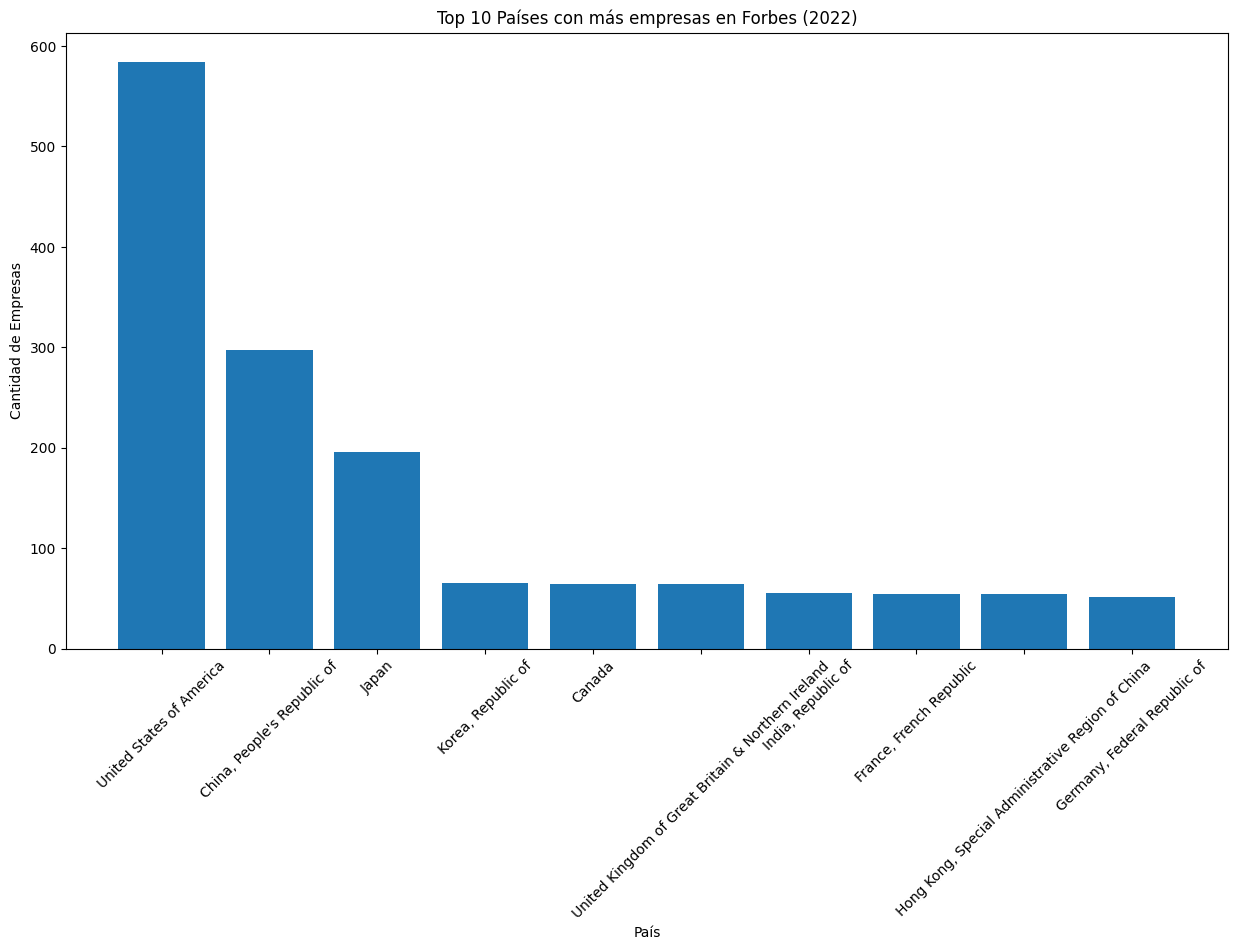

In [396]:
# CUESTIONARIO A - 1


# Obtener los datos de las 10 principales empresas por país
top_10_empresas_forbes_2022 = forbesgloba_merge2_2000_2022.groupby('Pais')['Empresa'].count().sort_values(ascending=False).head(10)

# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(top_10_empresas_forbes_2022.index, top_10_empresas_forbes_2022.values)
ax.set_title("Top 10 Países con más empresas en Forbes (2022)")
ax.set_xlabel("País")
ax.set_ylabel("Cantidad de Empresas")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


### CUESTIONARIO A - 2

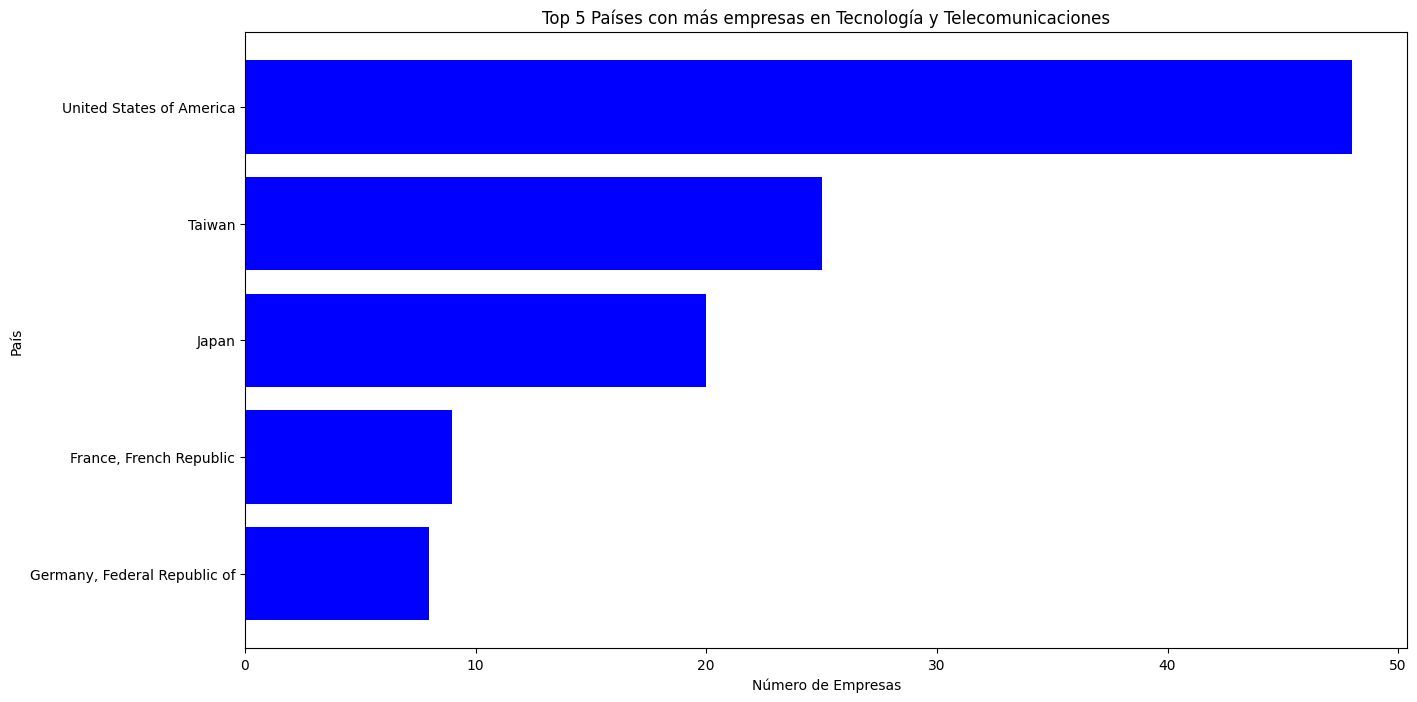

In [395]:
# CUESTIONARIO A - 2

# Obtener los datos del top 5 de países con más empresas en tecnología y telecomunicaciones
top_paises_tec_tel = top_paises_tec_tel.sort_values(by='Numero de Empresas', ascending=True)  # Orden ascendente para el gráfico de barras horizontales

# Configurar el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(top_paises_tec_tel['Pais'], top_paises_tec_tel['Numero de Empresas'], color='blue')
ax.set_title("Top 5 Países con más empresas en Tecnología y Telecomunicaciones")
ax.set_xlabel("Número de Empresas")
ax.set_ylabel("País")

# Mostrar el gráfico
plt.show()


### CUESTIONARIO A - 3

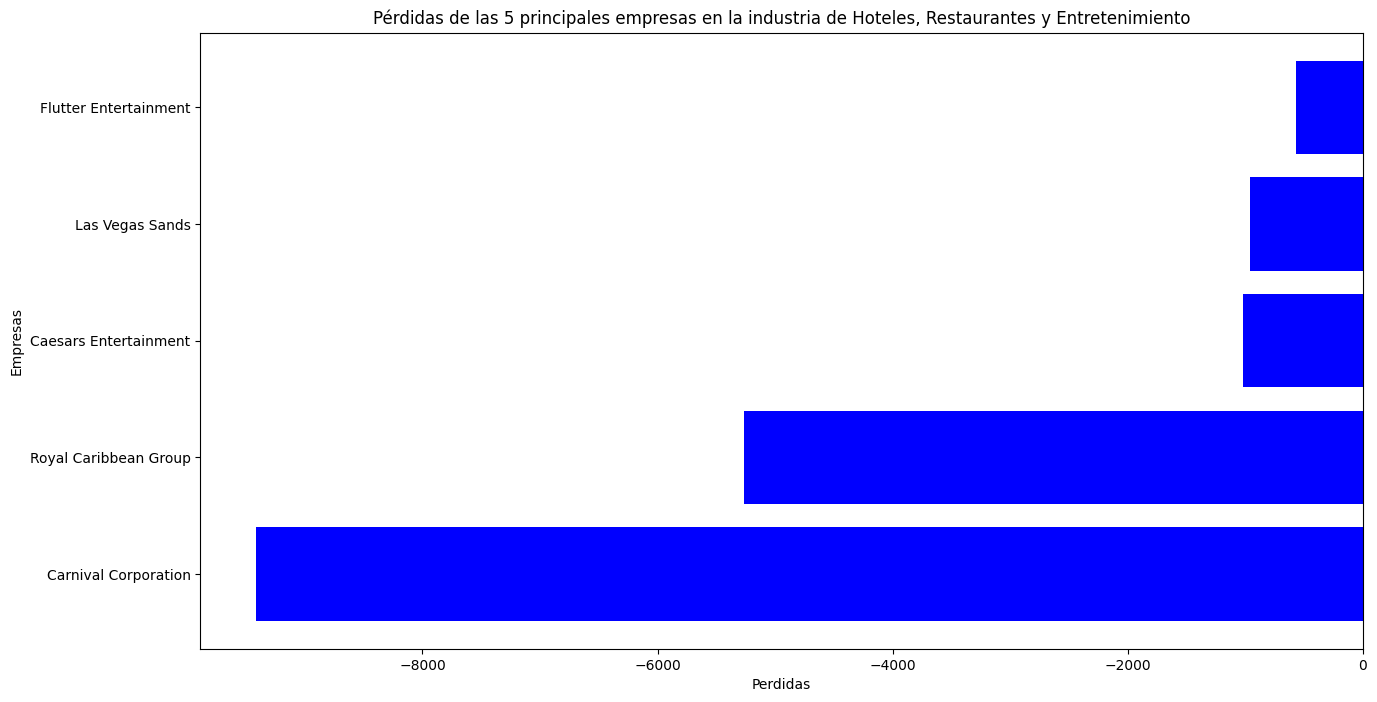

In [407]:
#CUESTIONARIO A - 3

# Crear una lista de nombres de empresas y sus pérdidas
empresas = top_5_peores['Empresa'].tolist()
perdidas = top_5_peores['Ganancias'].tolist()


# Configurar el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(empresas, perdidas, color='blue')
ax.set_title("Pérdidas de las 5 principales empresas en la industria de Hoteles, Restaurantes y Entretenimiento")
ax.set_xlabel("Perdidas")
ax.set_ylabel("Empresas")


# Mostrar el gráfico
plt.show()


### CUESTIONARIO A - 4

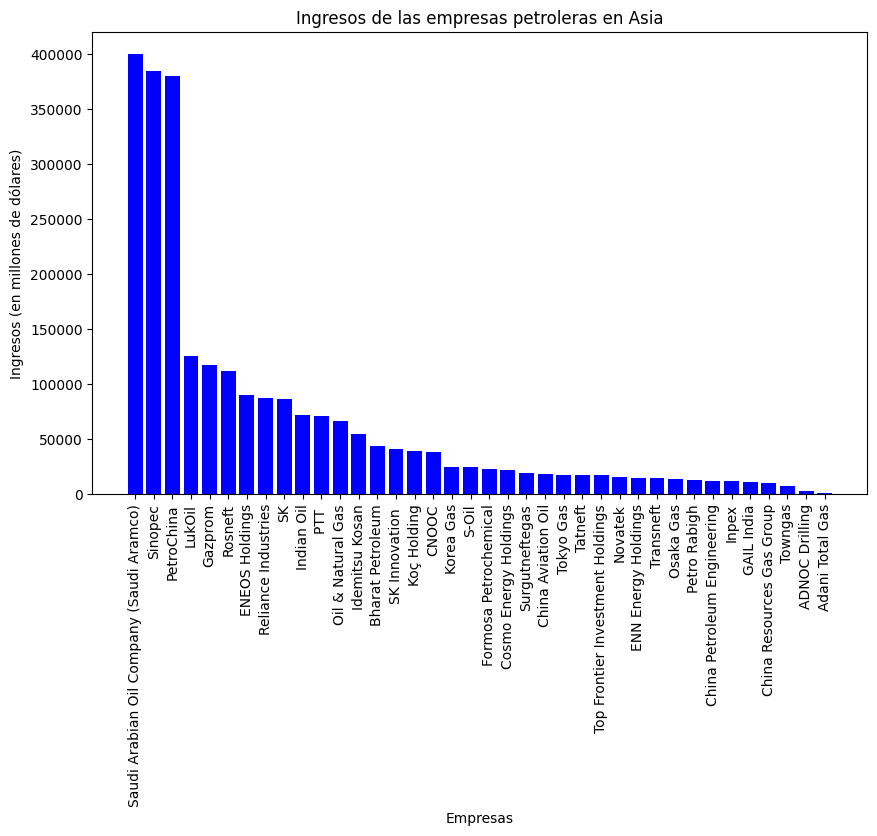

In [408]:
#CUESTIONARIO A - 4


# Filtrar el DataFrame para incluir solo las empresas de la industria petrolera en Asia
df_petroleras_asia = forbesgloba_merge2_2000_2022[(forbesgloba_merge2_2000_2022['Nombre Continente'] == 'Asia') & (forbesgloba_merge2_2000_2022['Industria'] == 'Oil & Gas Operations')]

# Ordenar el DataFrame por los ingresos de manera descendente
df_petroleras_asia = df_petroleras_asia.sort_values('Ingresos', ascending=False)

# Obtener los nombres de las empresas y los ingresos correspondientes
empresas = df_petroleras_asia['Empresa'].tolist()
ingresos = df_petroleras_asia['Ingresos'].tolist()

# Configurar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(empresas, ingresos, color='blue')
plt.title('Ingresos de las empresas petroleras en Asia')
plt.xlabel('Empresas')
plt.ylabel('Ingresos (en millones de dólares)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()


### CUESTIONARIO A - 5

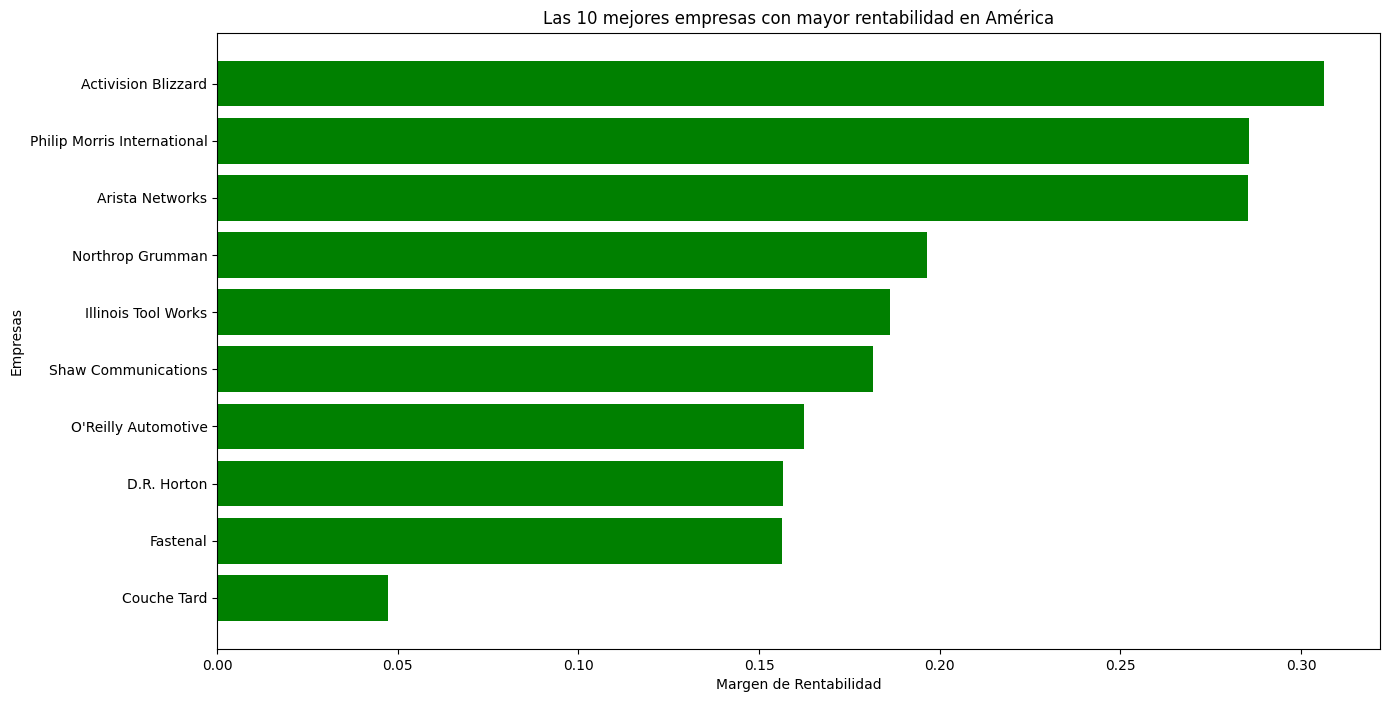

In [423]:
# CUESTIONARIO A - 5

auxiliar = forbesgloba_merge2_2000_2022[forbesgloba_merge2_2000_2022['Margen de Rentabilidad'] != 'Sin empresa']


# Filtrar el DataFrame para incluir solo las empresas en América
empresas_americanas = auxiliar[(auxiliar['Nombre Continente'] == 'North America') | (auxiliar['Nombre Continente'] == 'South America')]

# Ordenar el DataFrame por industria y rentabilidad de manera descendente
df_ordenado = empresas_americanas.sort_values(['Industria', 'Margen de Rentabilidad'], ascending=False)

# Eliminar filas duplicadas, manteniendo solo las filas con la mayor rentabilidad en cada grupo
empresas_destacadas = df_ordenado.drop_duplicates(subset='Industria').sort_values('Margen de Rentabilidad').head(10)

# Obtener los nombres de las empresas y la rentabilidad correspondiente
empresas = empresas_destacadas['Empresa'].tolist()
rentabilidad = empresas_destacadas['Margen de Rentabilidad'].tolist()

# Configurar el gráfico de barras horizontales
plt.figure(figsize=(15, 8))
plt.barh(empresas, rentabilidad, color='green')
plt.title('Las 10 mejores empresas con mayor rentabilidad en América')
plt.xlabel('Margen de Rentabilidad')
plt.ylabel('Empresas')

# Mostrar el gráfico
plt.show()


### CUESTIONARIO A - 6

<ipython-input-436-7049a4b44043>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forbesgloba_merge2_2000_2022_p['Ganancias'] = forbesgloba_merge2_2000_2022_p['Ganancias'].astype(float)


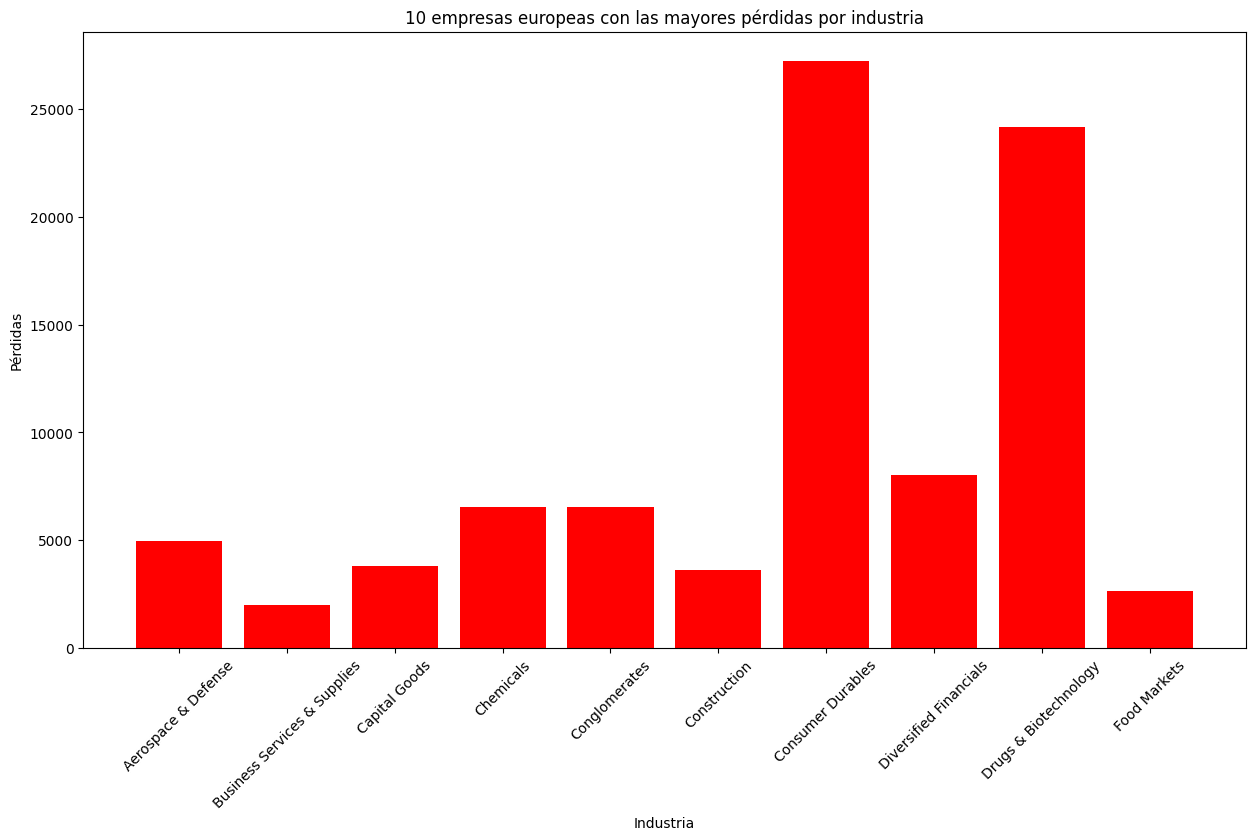

In [436]:
# CUESTIONARIO A - 6

# Filtrar el DataFrame para incluir solo las filas con valores de 'Ganancias' negativos
forbesgloba_merge2_2000_2022_p = forbesgloba_merge2_2000_2022[forbesgloba_merge2_2000_2022['Ganancias'] != 'Sin empresa']
forbesgloba_merge2_2000_2022_p['Ganancias'] = forbesgloba_merge2_2000_2022_p['Ganancias'].astype(float)

# Filtrar el DataFrame para incluir solo las empresas europeas y excluir la industria bancaria
df_europeas_sin_bancos = forbesgloba_merge2_2000_2022_p[(forbesgloba_merge2_2000_2022_p['Nombre Continente'] == 'Europe') & (forbesgloba_merge2_2000_2022_p['Industria'] != 'Banking')]

# Agrupar el DataFrame filtrado por la columna "Industria" y encontrar las empresas con las mayores pérdidas en cada industria
empresas_mayores_perdidas = df_europeas_sin_bancos.groupby('Industria')['Ganancias'].nlargest(1).head(10)

# Obtener los datos de las empresas con las mayores pérdidas
empresas_destacadas = df_europeas_sin_bancos.loc[empresas_mayores_perdidas.droplevel(0).index]

# Configurar el gráfico de barras verticales
plt.figure(figsize=(15, 8))
plt.bar(empresas_destacadas['Industria'], empresas_destacadas['Ganancias'], color='red')
plt.title('10 empresas europeas con las mayores pérdidas por industria')
plt.xlabel('Industria')
plt.ylabel('Pérdidas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


### CUESTIONARIO A - 7

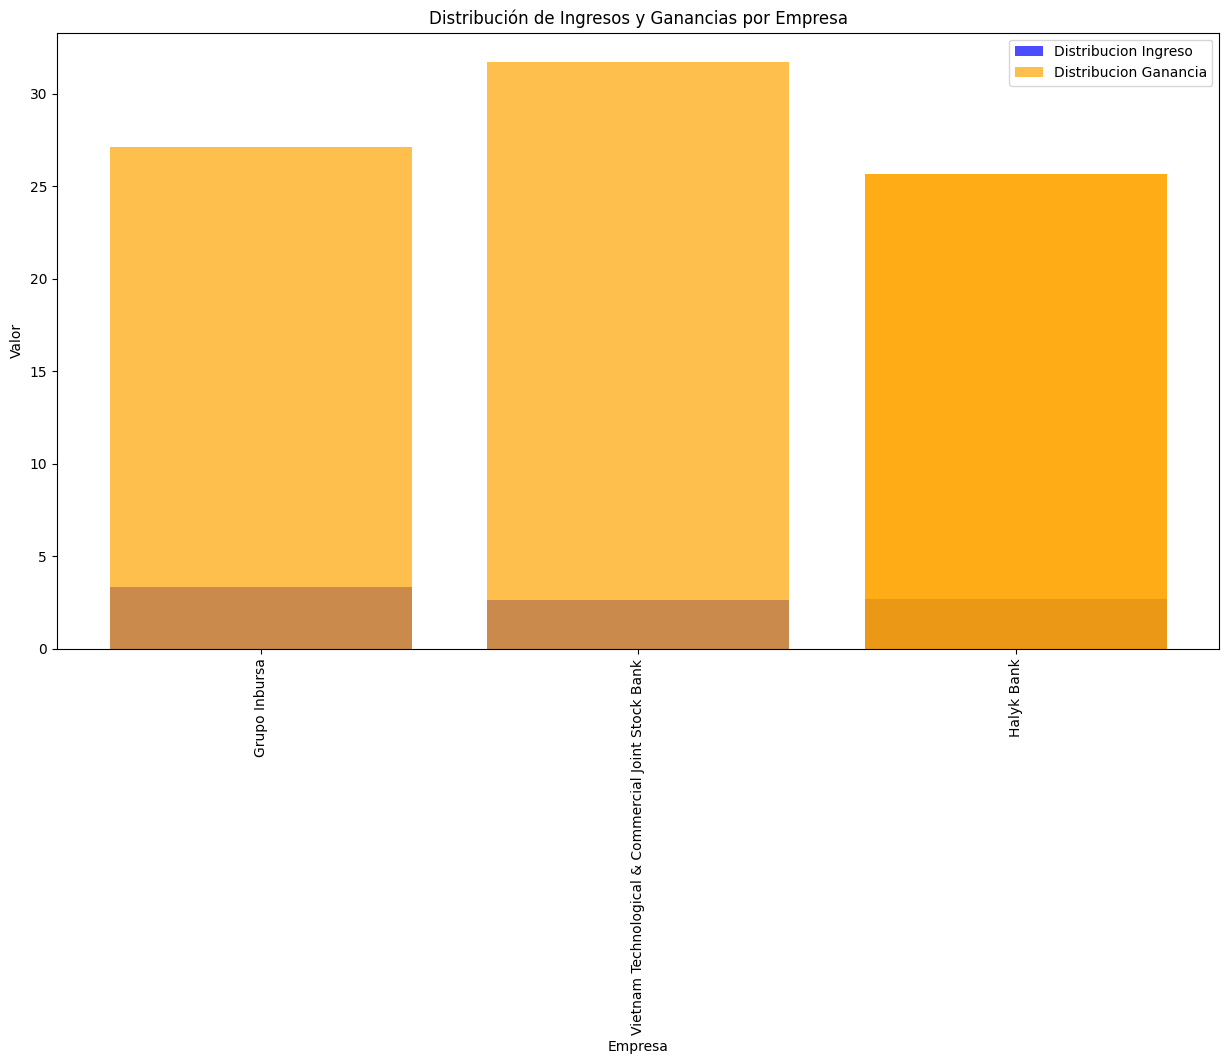

In [435]:
#CUESTIONARIO A - 7
import matplotlib.pyplot as plt

# Configurar el gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(data_frame_distribucion_bank['Empresa'], data_frame_distribucion_bank['Distribucion Ingreso'], label='Distribucion Ingreso', color='blue', alpha=0.7)
plt.bar(data_frame_distribucion_bank['Empresa'], data_frame_distribucion_bank['Distribucion Ganancia'], label='Distribucion Ganancia', color='orange', alpha=0.7)

plt.title('Distribución de Ingresos y Ganancias por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Valor')
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.show()



### CUESTIONARIO B - 1

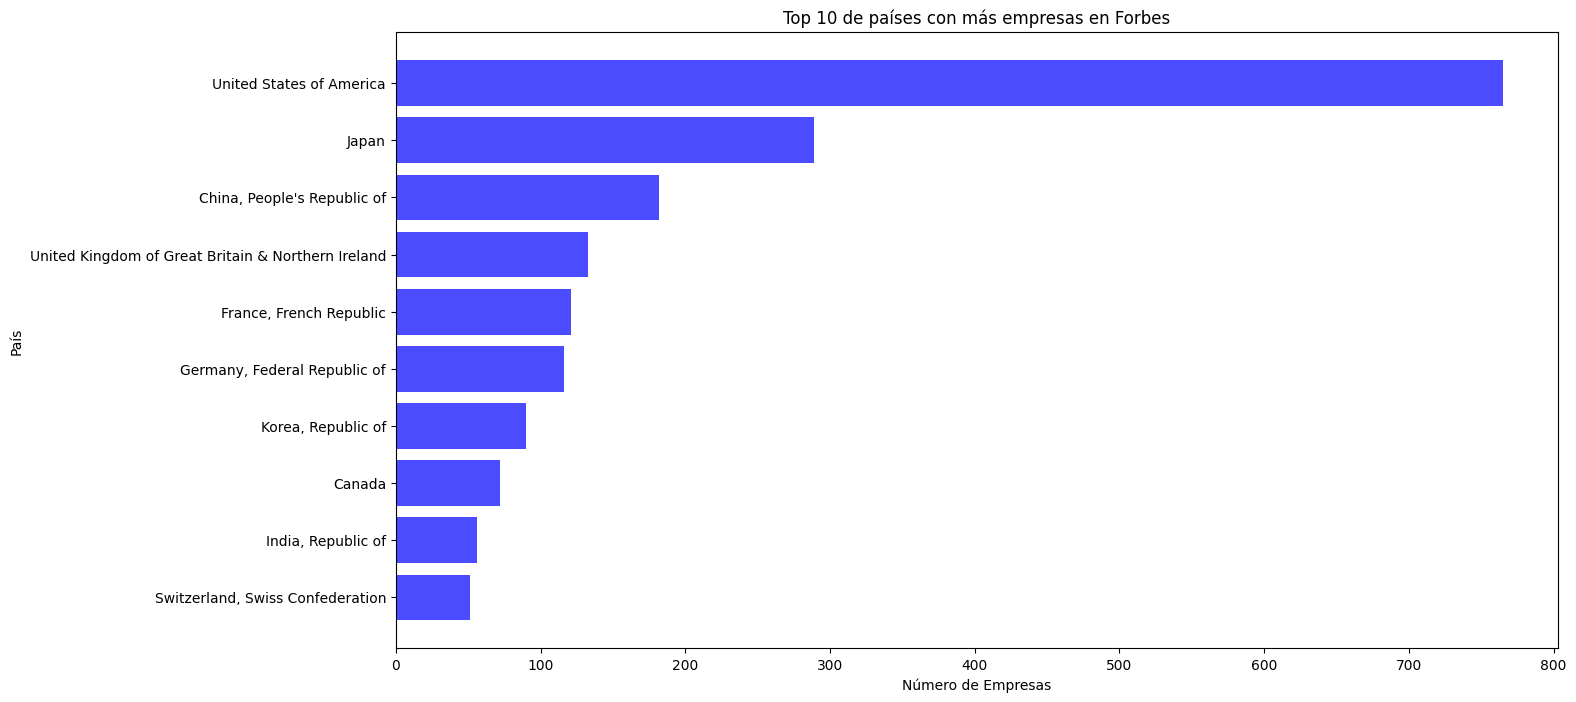

In [438]:
#CUESTIONARIO B - 1

import matplotlib.pyplot as plt

# Configurar el gráfico de barras horizontales
plt.figure(figsize=(15, 8))
plt.barh(top_paises['Pais'], top_paises['Numero de Empresas'], color='blue', alpha=0.7)

plt.title('Top 10 de países con más empresas en Forbes')
plt.xlabel('Número de Empresas')
plt.ylabel('País')

# Invertir el orden del eje y para mostrar los países en orden descendente
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()



###CUESTIONARIO B - 2

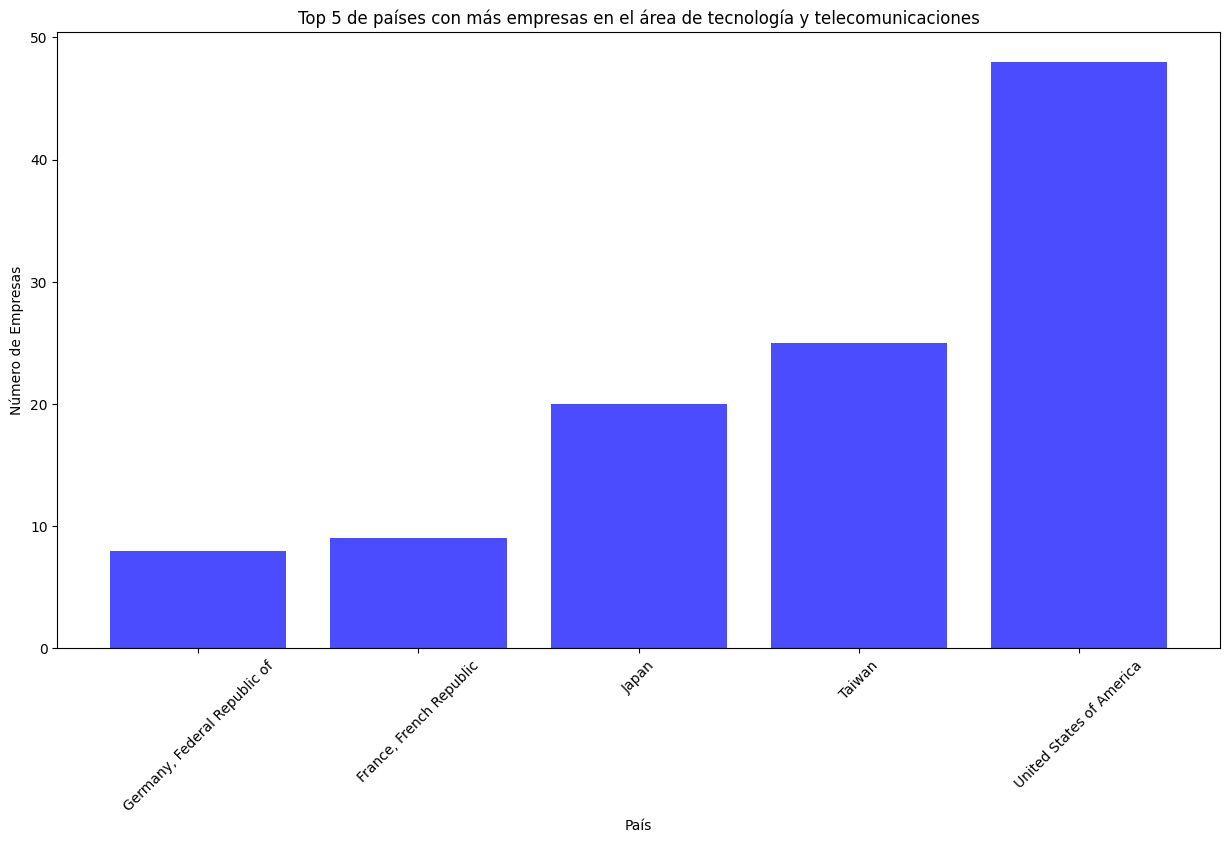

In [440]:
#CUESTIONARIO B - 2

import matplotlib.pyplot as plt

# Configurar el gráfico de barras verticales
plt.figure(figsize=(15, 8))
plt.bar(top_paises_tec_tel['Pais'], top_paises_tec_tel['Numero de Empresas'], color='blue', alpha=0.7)

plt.title('Top 5 de países con más empresas en el área de tecnología y telecomunicaciones')
plt.xlabel('País')
plt.ylabel('Número de Empresas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


###CUESTIONARIO B - 3

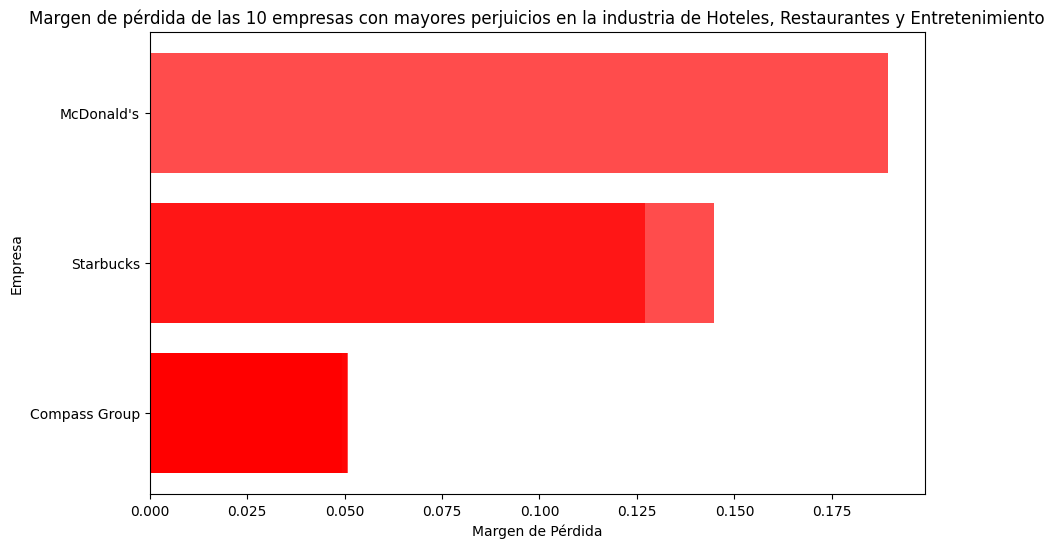

In [450]:
#CUESTIONARIO B - 3
import matplotlib.pyplot as plt

# Configurar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_empresas_perdidas['Empresa'], top_empresas_perdidas['Margen de Pérdida'], color='red', alpha=0.7)

plt.title("Margen de pérdida de las 10 empresas con mayores perjuicios en la industria de Hoteles, Restaurantes y Entretenimiento")
plt.xlabel("Margen de Pérdida")
plt.ylabel("Empresa")

# Mostrar el gráfico
plt.show()


### CUESTIONARIO  B - 4

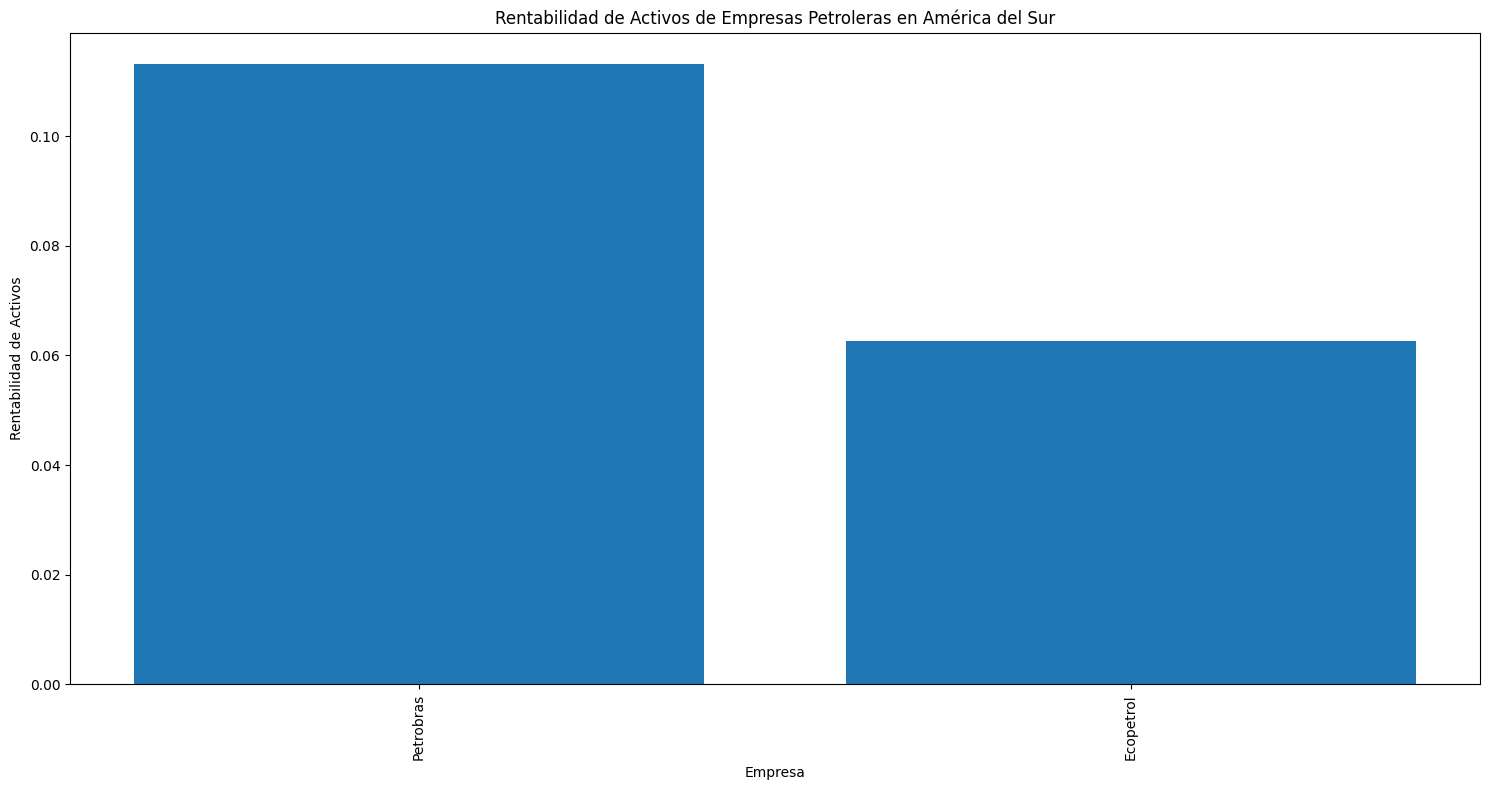

In [463]:
#CUESTIONARIO B - 4

import matplotlib.pyplot as plt

# Datos de ejemplo
empresas = ['Petrobras', 'Ecopetrol', 'Petrobras', 'Petrobras', 'Petrobras', 'Petrobras']
rentabilidad = [0.113165, 0.062706, 0.044201, 0.031759, 0.007249, 0.002589]

# Configurar el gráfico de barras verticales
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(empresas, rentabilidad)
ax.set_xlabel('Empresa')
ax.set_ylabel('Rentabilidad de Activos')
ax.set_title('Rentabilidad de Activos de Empresas Petroleras en América del Sur')
ax.tick_params(axis='x', rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### CUESTIONARIO B - 5

<ipython-input-466-ae7310dbe8b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas_europeas['Margen de Rentabilidad'] = empresas_europeas['Margen de Rentabilidad'].astype(float)


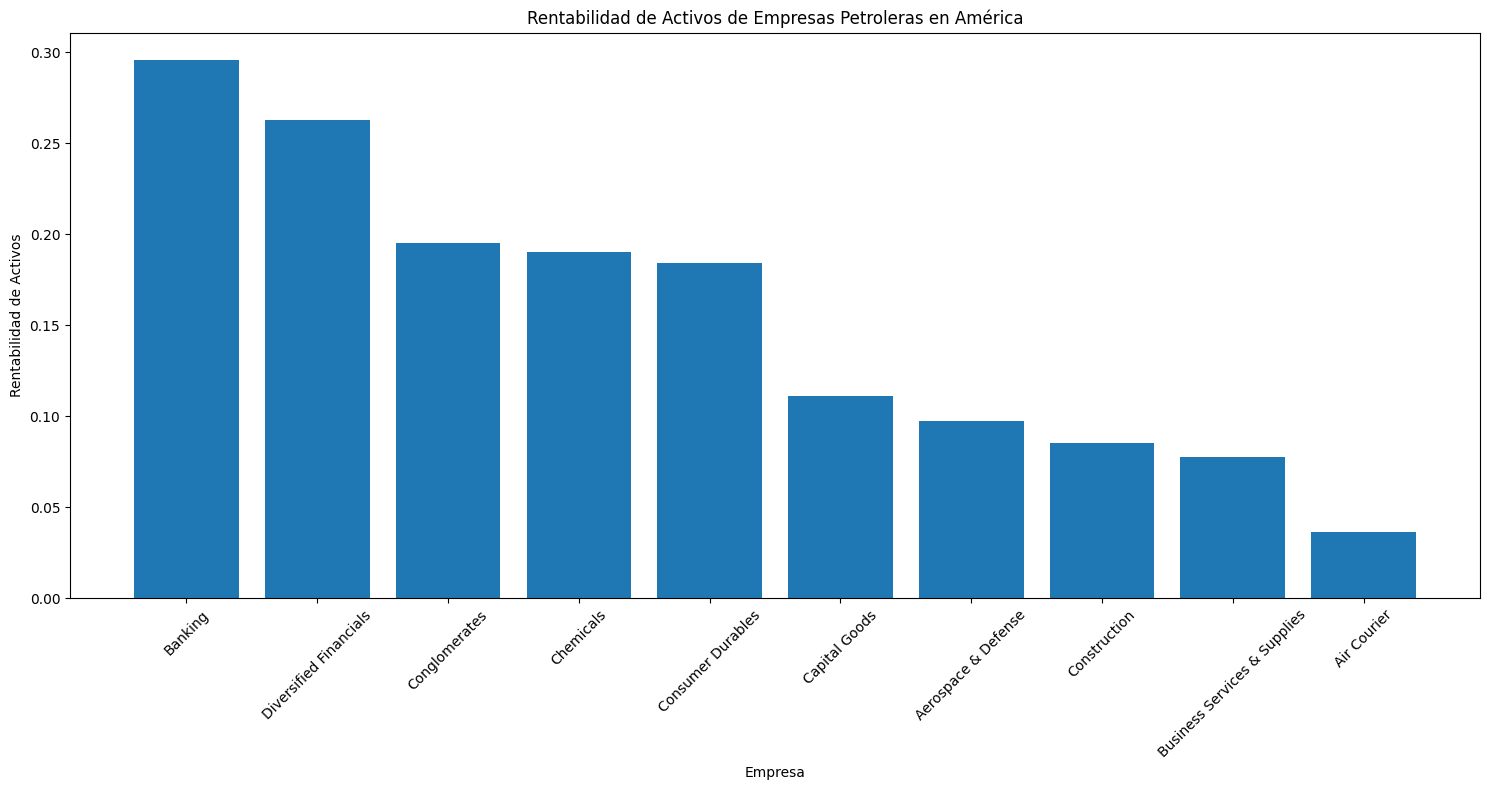

In [466]:
#CUESTIONARIO B - 5

import matplotlib.pyplot as plt

#Filtro por empresas europeas
empresas_europeas = forbes_fortune[forbes_fortune['Nombre Continente'] == 'Europe']
empresas_europeas['Margen de Rentabilidad'] = empresas_europeas['Margen de Rentabilidad'].astype(float)

#Eliminamos el registro que este 'Sin empresa'
empresas_europeas = empresas_europeas[empresas_europeas['Activos'] != 'Sin empresa']
empresas_europeas = empresas_europeas[empresas_europeas['Margen de Rentabilidad'] != 1.849678555028318]


#Identificamos el mayor rentabilidad por empresa
empresas_mejor_rentabilidad = empresas_europeas.groupby('Industria')['Margen de Rentabilidad'].idxmax()


empresas_destacadas = empresas_europeas.loc[empresas_mejor_rentabilidad]

#Generamos dataframe y filtramos los primeros 10 y por orden descendente
empresas_destacada_dataframe = pd.DataFrame(empresas_destacadas).head(10).sort_values('Margen de Rentabilidad',ascending=False)


# Datos
empresas = empresas_destacada_dataframe['Industria']
rentabilidad = empresas_destacada_dataframe['Margen de Rentabilidad']

# Configurar el gráfico de barras verticales
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(empresas, rentabilidad)
ax.set_xlabel('Empresa')
ax.set_ylabel('Rentabilidad de Activos')
ax.set_title('Rentabilidad de Activos de Empresas Petroleras en América')
ax.tick_params(axis='x', rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()







###CUESTIONARIO B - 6

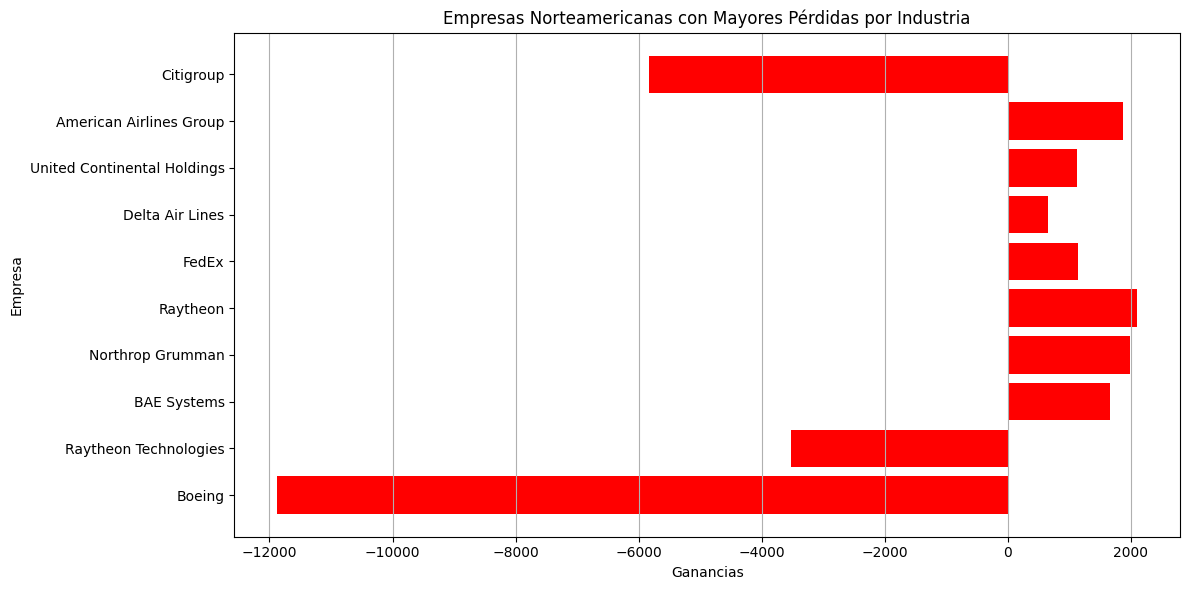

In [484]:
import matplotlib.pyplot as plt

# Convierto la columna "Ganancias" a tipo de datos numérico
empresas_norteamericanas['Ganancias'] = pd.to_numeric(empresas_norteamericanas['Ganancias'])

# Filtro el DataFrame para incluir solo las empresas norteamericanas
empresas_norteamericanas = empresas_norteamericanas[empresas_norteamericanas['Nombre Continente'] == 'North America']

# Agrupo el DataFrame filtrado por la columna "Industria" y encontrar las empresas con las mayores pérdidas en cada industria
empresas_mayores_perdidas = empresas_norteamericanas.groupby('Industria')['Ganancias'].nsmallest(10)

# Obtengo los datos de las empresas con las mayores pérdidas
empresas_destacadas = empresas_norteamericanas.loc[empresas_mayores_perdidas.index.get_level_values(1)]

# Las empresas norteamericanas con las mayores pérdidas registradas por industria a nivel global
americana_perdida = pd.DataFrame(empresas_destacadas)

# Elimino duplicados de empresas
americana_perdida = americana_perdida.drop_duplicates(subset='Empresa').head(10)

# Configurar el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(americana_perdida['Empresa'], americana_perdida['Ganancias'], color='red')
ax.set_xlabel('Ganancias')
ax.set_ylabel('Empresa')
ax.set_title('Empresas Norteamericanas con Mayores Pérdidas por Industria')
ax.grid(axis='x')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

